<a href="https://colab.research.google.com/github/Tongkat4/MY-ANALYSIS/blob/main/TECHNOLOGY_SECTOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
import datetime
import re
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
df= pd.read_csv('drive/MyDrive/financial_report.csv',encoding='cp1252')
df

,company,stock_name,fye,qtr,qrd,date_announced,cipr,pipr,ccpr,pcpr,cippl,pippl,ccppl,pcppl,cipplt,pipplt,ccpplt,pcpplt,ref
0,ENGLOTECHS HOLDING BHD,ENGLOTC \n,31/12/2004,4,31/12/2004,28 Feb 2005,20947,20852.0,85660,75408.0,"2,196","3,157","10,425","11,159","2,088","2,728","9,161","9,438",562307
1,COMSA FARMS BERHAD,COMSA \n,31/12/2004,3,31/03/2005,28 Feb 2005,60978,52718.0,188551,168711.0,"2,523","2,948","10,238","8,794","2,626","3,320","9,069","10,320",562310
2,WOO HING BROTHERS (MALAYA) BERHAD,WOOHING \n,31/12/2004,4,31/12/2004,28 Feb 2005,0,0.0,0,711.0,-152,"-2,041",-847,"-8,031",-152,"-2,041",-847,"-8,031",562329
3,CME GROUP BERHAD,CME \n,31/12/2004,4,31/12/2004,25 Feb 2005,1615,12703.0,2041,14958.0,"-1,215",-986,"-4,862","-3,694","-1,215","-1,113","-4,862","-3,821",562336
4,PANTAI HOLDINGS BERHAD,PANTAI \n,31/12/2004,2,30/06/2005,22 Feb 2005,167865,151478.0,340327,297237.0,"15,664","8,614","31,416","16,392","10,008","4,385","19,508","8,718",562342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8591,IFCA MSC BERHAD,IFCAMSC,31-Dec-18,3 Qtr,30-Sep-18,16-Nov-18,22196,23003.0,60959,62889.0,"2,200","2,708","5,664","8,677","1,403","1,864","2,985","5,818",2905712
8592,MISC BERHAD,MISC,31-Dec-18,3 Qtr,30-Sep-18,19-Nov-18,2229200,2315800.0,6391800,7603200.0,"351,100","706,200","988,800","1,961,500","339,200","695,800","957,400","1,943,500",2905860
8593,ACOUSTECH BERHAD,ACOSTEC,31-Dec-18,3 Qtr,30-Sep-18,19-Nov-18,10789,12920.0,29542,30189.0,"-1,066","-2,713","-1,910","-8,949","-1,108","-2,844","-2,035","-8,056",2906030
8594,PANSAR BERHAD,PANSAR,31-Mar-19,2 Qtr,30-Sep-18,21-Nov-18,97407,97056.0,194553,187401.0,"1,868","3,230","5,003","5,857","1,251","2,498","3,630","4,554",2906331


In [32]:
df['stock_name'] = df['stock_name'].str.replace('\n','').str.replace(' ','')
#df['stock_name']=df['stock_name'].replace(r"^ +| +$", r"", regex=True, inplace=True)
df['qtr'] = df['qtr'].str.replace('Qtr','').str.replace('Other','0').str.replace(' ','').astype(int)
df['fye'] = pd.to_datetime(df['fye'])
df['qrd'] = pd.to_datetime(df['qrd'])
df['date_announced'] = pd.to_datetime(df['date_announced'])
#Extract Year from fye
df['Year'] = pd. DatetimeIndex(df['fye']). year
#Extrace Year annouced 
df['Year_ann'] = pd. DatetimeIndex(df['date_announced']). year
df['cippl'] = df['cippl'].str.replace(',','').astype(float)
df['pippl'] = df['pippl'].str.replace(',','').astype(float)
df['ccppl'] = df['ccppl'].str.replace(',','').astype(float)
df['pcppl'] = df['pcppl'].str.replace(',','').astype(float)
df['cipplt'] = df['cipplt'].str.replace(',','').astype(float)
df['pipplt'] = df['pipplt'].str.replace(',','').astype(float)
df['ccpplt'] = df['ccpplt'].str.replace(',','').astype(float)
df['pcpplt'] = df['pcpplt'].str.replace(',','').astype(float)


In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8596 entries, 0 to 8595
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   company         8596 non-null   object        
 1   stock_name      8596 non-null   object        
 2   fye             8596 non-null   datetime64[ns]
 3   qtr             8596 non-null   int64         
 4   qrd             8596 non-null   datetime64[ns]
 5   date_announced  8596 non-null   datetime64[ns]
 6   cipr            8596 non-null   int64         
 7   pipr            8515 non-null   float64       
 8   ccpr            8596 non-null   int64         
 9   pcpr            8514 non-null   float64       
 10  cippl           8596 non-null   float64       
 11  pippl           8516 non-null   float64       
 12  ccppl           8596 non-null   float64       
 13  pcppl           8516 non-null   float64       
 14  cipplt          8596 non-null   float64       
 15  pipp

In [34]:
df

,company,stock_name,fye,qtr,qrd,date_announced,cipr,pipr,ccpr,pcpr,cippl,pippl,ccppl,pcppl,cipplt,pipplt,ccpplt,pcpplt,ref,Year,Year_ann
0,ENGLOTECHS HOLDING BHD,ENGLOTC,2004-12-31,4,2004-12-31,2005-02-28,20947,20852.0,85660,75408.0,2196.0,3157.0,10425.0,11159.0,2088.0,2728.0,9161.0,9438.0,562307,2004,2005
1,COMSA FARMS BERHAD,COMSA,2004-12-31,3,2005-03-31,2005-02-28,60978,52718.0,188551,168711.0,2523.0,2948.0,10238.0,8794.0,2626.0,3320.0,9069.0,10320.0,562310,2004,2005
2,WOO HING BROTHERS (MALAYA) BERHAD,WOOHING,2004-12-31,4,2004-12-31,2005-02-28,0,0.0,0,711.0,-152.0,-2041.0,-847.0,-8031.0,-152.0,-2041.0,-847.0,-8031.0,562329,2004,2005
3,CME GROUP BERHAD,CME,2004-12-31,4,2004-12-31,2005-02-25,1615,12703.0,2041,14958.0,-1215.0,-986.0,-4862.0,-3694.0,-1215.0,-1113.0,-4862.0,-3821.0,562336,2004,2005
4,PANTAI HOLDINGS BERHAD,PANTAI,2004-12-31,2,2005-06-30,2005-02-22,167865,151478.0,340327,297237.0,15664.0,8614.0,31416.0,16392.0,10008.0,4385.0,19508.0,8718.0,562342,2004,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8591,IFCA MSC BERHAD,IFCAMSC,2018-12-31,3,2018-09-30,2018-11-16,22196,23003.0,60959,62889.0,2200.0,2708.0,5664.0,8677.0,1403.0,1864.0,2985.0,5818.0,2905712,2018,2018
8592,MISC BERHAD,MISC,2018-12-31,3,2018-09-30,2018-11-19,2229200,2315800.0,6391800,7603200.0,351100.0,706200.0,988800.0,1961500.0,339200.0,695800.0,957400.0,1943500.0,2905860,2018,2018
8593,ACOUSTECH BERHAD,ACOSTEC,2018-12-31,3,2018-09-30,2018-11-19,10789,12920.0,29542,30189.0,-1066.0,-2713.0,-1910.0,-8949.0,-1108.0,-2844.0,-2035.0,-8056.0,2906030,2018,2018
8594,PANSAR BERHAD,PANSAR,2019-03-31,2,2018-09-30,2018-11-21,97407,97056.0,194553,187401.0,1868.0,3230.0,5003.0,5857.0,1251.0,2498.0,3630.0,4554.0,2906331,2019,2018


In [36]:
df['cipr'] = df['cipr']*1000
df['pipr'] = df['pipr']*1000
df['ccpr'] = df['ccpr']*1000
df['pcpr'] = df['pcpr']*1000


df['cippl'] = df['cippl']*1000
df['pippl'] = df['pippl']*1000
df['ccppl'] = df['ccppl']*1000
df['pcppl'] = df['pcppl']*1000

df['cipplt'] = df['cipplt']*1000
df['pipplt'] = df['pipplt']*1000
df['ccpplt'] = df['ccpplt']*1000
df['pcpplt'] = df['pcpplt']*1000

In [37]:
df

,company,stock_name,fye,qtr,qrd,date_announced,cipr,pipr,ccpr,pcpr,cippl,pippl,ccppl,pcppl,cipplt,pipplt,ccpplt,pcpplt,ref,Year,Year_ann
0,ENGLOTECHS HOLDING BHD,ENGLOTC,2004-12-31,4,2004-12-31,2005-02-28,20947000000,2.085200e+10,85660000000,7.540800e+10,2.196000e+09,3.157000e+09,1.042500e+10,1.115900e+10,2.088000e+09,2.728000e+09,9.161000e+09,9.438000e+09,562307,2004,2005
1,COMSA FARMS BERHAD,COMSA,2004-12-31,3,2005-03-31,2005-02-28,60978000000,5.271800e+10,188551000000,1.687110e+11,2.523000e+09,2.948000e+09,1.023800e+10,8.794000e+09,2.626000e+09,3.320000e+09,9.069000e+09,1.032000e+10,562310,2004,2005
2,WOO HING BROTHERS (MALAYA) BERHAD,WOOHING,2004-12-31,4,2004-12-31,2005-02-28,0,0.000000e+00,0,7.110000e+08,-1.520000e+08,-2.041000e+09,-8.470000e+08,-8.031000e+09,-1.520000e+08,-2.041000e+09,-8.470000e+08,-8.031000e+09,562329,2004,2005
3,CME GROUP BERHAD,CME,2004-12-31,4,2004-12-31,2005-02-25,1615000000,1.270300e+10,2041000000,1.495800e+10,-1.215000e+09,-9.860000e+08,-4.862000e+09,-3.694000e+09,-1.215000e+09,-1.113000e+09,-4.862000e+09,-3.821000e+09,562336,2004,2005
4,PANTAI HOLDINGS BERHAD,PANTAI,2004-12-31,2,2005-06-30,2005-02-22,167865000000,1.514780e+11,340327000000,2.972370e+11,1.566400e+10,8.614000e+09,3.141600e+10,1.639200e+10,1.000800e+10,4.385000e+09,1.950800e+10,8.718000e+09,562342,2004,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8591,IFCA MSC BERHAD,IFCAMSC,2018-12-31,3,2018-09-30,2018-11-16,22196000000,2.300300e+10,60959000000,6.288900e+10,2.200000e+09,2.708000e+09,5.664000e+09,8.677000e+09,1.403000e+09,1.864000e+09,2.985000e+09,5.818000e+09,2905712,2018,2018
8592,MISC BERHAD,MISC,2018-12-31,3,2018-09-30,2018-11-19,2229200000000,2.315800e+12,6391800000000,7.603200e+12,3.511000e+11,7.062000e+11,9.888000e+11,1.961500e+12,3.392000e+11,6.958000e+11,9.574000e+11,1.943500e+12,2905860,2018,2018
8593,ACOUSTECH BERHAD,ACOSTEC,2018-12-31,3,2018-09-30,2018-11-19,10789000000,1.292000e+10,29542000000,3.018900e+10,-1.066000e+09,-2.713000e+09,-1.910000e+09,-8.949000e+09,-1.108000e+09,-2.844000e+09,-2.035000e+09,-8.056000e+09,2906030,2018,2018
8594,PANSAR BERHAD,PANSAR,2019-03-31,2,2018-09-30,2018-11-21,97407000000,9.705600e+10,194553000000,1.874010e+11,1.868000e+09,3.230000e+09,5.003000e+09,5.857000e+09,1.251000e+09,2.498000e+09,3.630000e+09,4.554000e+09,2906331,2019,2018


In [38]:
type(df.loc[0,'stock_name'])

str

In [39]:
df.groupby('stock_name').size()

stock_name
3A           1
3A           6
A&M          2
A&M          6
AASIA        2
            ..
ZECON        9
ZELAN        2
ZELAN        2
ZHULIAN      3
ZHULIAN      4
Length: 2219, dtype: int64

In [40]:
df.groupby('qtr').size()

qtr
0      10
1    2151
2    2141
3    2136
4    2158
dtype: int64

In [41]:
df.groupby('Year').size()

Year
2004    125
2005    686
2006    624
2007    644
2008    627
2009    651
2010    629
2011    588
2012    591
2013    607
2014    594
2015    583
2016    592
2017    576
2018    440
2019     39
dtype: int64

In [42]:
ref = df[df['ref']==562307]
ref

,company,stock_name,fye,qtr,qrd,date_announced,cipr,pipr,ccpr,pcpr,cippl,pippl,ccppl,pcppl,cipplt,pipplt,ccpplt,pcpplt,ref,Year,Year_ann
0,ENGLOTECHS HOLDING BHD,ENGLOTC,2004-12-31,4,2004-12-31,2005-02-28,20947000000,2.085200e+10,85660000000,7.540800e+10,2.196000e+09,3.157000e+09,1.042500e+10,1.115900e+10,2.088000e+09,2.728000e+09,9.161000e+09,9.438000e+09,562307,2004,2005


In [43]:
ref['cipr'] = ref['cipr']*1000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
ref

,company,stock_name,fye,qtr,qrd,date_announced,cipr,pipr,ccpr,pcpr,cippl,pippl,ccppl,pcppl,cipplt,pipplt,ccpplt,pcpplt,ref,Year,Year_ann
0,ENGLOTECHS HOLDING BHD,ENGLOTC,2004-12-31,4,2004-12-31,2005-02-28,20947000000000,2.085200e+10,85660000000,7.540800e+10,2.196000e+09,3.157000e+09,1.042500e+10,1.115900e+10,2.088000e+09,2.728000e+09,9.161000e+09,9.438000e+09,562307,2004,2005


**Dataset overview**
Samples :8596

No of Company :1487

**Timeline**
from 2004

to 2019

Seperated by quarter in each year

fye = Financial Year End

**Revenue**

qrd = quaterly report date
cipr = current individual period revenue
pipr = previous individual period revenue
ccpr = current cummulative period revenue
pcpr = previous cummulative period revenue

**Profit loss**

cippl = current individual period profit loss
pippl = previous individual period profit loss
ccppl = current cummulative period profit loss
pcppl = previous cummulative period profit loss

**Profit loss taxed**

cipplt = current individual period profit loss taxed
pipplt = previous individual period profit loss taxed
ccpplt = current cummulative period profit loss taxed
pcpplt = previous cummulative period profit loss taxed


**EXTERNAL DATA PREPARATION**

In [45]:
#import Stock price data
bursa = pd.read_csv('drive/MyDrive/yahoo_price.csv')
bursa

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Code,Stock,Date,Open,High,Low,Close,Adj Close,Volume,Created At,Updated At
0,03041,1TECH,2021-05-04 00:00:00.000000,0.22,0.26,0.22,0.26,0.26,140000.0,2021-05-19 17:33:35.620715,NaN
1,03041,1TECH,2021-05-05 00:00:00.000000,0.26,0.26,0.26,0.26,0.26,0.0,2021-05-19 17:33:35.620715,NaN
2,03041,1TECH,2021-05-06 00:00:00.000000,0.26,0.26,0.26,0.26,0.26,0.0,2021-05-19 17:33:35.620715,NaN
3,03041,1TECH,2021-05-07 00:00:00.000000,0.26,0.26,0.26,0.26,0.26,0.0,2021-05-19 17:33:35.620715,NaN
4,03041,1TECH,2021-05-10 00:00:00.000000,0.26,0.26,0.26,0.26,0.26,0.0,2021-05-19 17:33:35.620715,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3827272,5131,ZHULIAN,2021-05-11 00:00:00.000000,1.90,1.93,1.88,1.92,1.92,109500.0,2021-05-19 17:37:52.141351,NaN
3827273,5131,ZHULIAN,2021-05-12 00:00:00.000000,1.92,1.94,1.90,1.91,1.91,40000.0,2021-05-19 17:37:52.141351,NaN
3827274,5131,ZHULIAN,2021-05-17 00:00:00.000000,1.91,1.91,1.85,1.85,1.85,311200.0,2021-05-19 17:37:52.141351,NaN
3827275,5131,ZHULIAN,2021-05-18 00:00:00.000000,1.86,1.90,1.85,1.90,1.90,63500.0,2021-05-19 17:37:52.141351,NaN


In [46]:
bursa['Date'] = pd.to_datetime(bursa['Date'])

In [47]:
bursa = bursa.loc[:,['Code','Stock','Date','Close']]
bursa

,Code,Stock,Date,Close
0,03041,1TECH,2021-05-04,0.26
1,03041,1TECH,2021-05-05,0.26
2,03041,1TECH,2021-05-06,0.26
3,03041,1TECH,2021-05-07,0.26
4,03041,1TECH,2021-05-10,0.26
...,...,...,...,...
3827272,5131,ZHULIAN,2021-05-11,1.92
3827273,5131,ZHULIAN,2021-05-12,1.91
3827274,5131,ZHULIAN,2021-05-17,1.85
3827275,5131,ZHULIAN,2021-05-18,1.90


**Import KLCI INDEX**

In [48]:
tech_index = pd.read_csv('drive/MyDrive/KL Technology Historical Data.csv')
#tech_index['Date'] = pd.to_datetime(tech_index['Date'])
tech_index = tech_index.sort_values(by = 'Date',ascending = 1)
tech_index


,Date,Price,Open,High,Low,Vol.,Change %
1767,"Apr 01, 2014",16.73,16.28,16.77,16.27,143.80M,2.95%
1521,"Apr 01, 2015",21.57,21.36,21.57,21.35,96.82M,1.17%
1273,"Apr 01, 2016",22.66,22.69,22.72,22.62,17.88M,-0.04%
541,"Apr 01, 2019",32.79,32.63,32.81,32.42,150.56M,0.83%
293,"Apr 01, 2020",29.36,29.46,30.68,29.31,528.87M,-0.78%
...,...,...,...,...,...,...,...
1644,"Sep 30, 2014",19.70,19.77,19.80,19.66,86.42M,-0.35%
1397,"Sep 30, 2015",21.27,20.97,21.28,20.97,31.08M,1.53%
1150,"Sep 30, 2016",22.55,22.78,22.85,22.51,45.58M,-1.05%
421,"Sep 30, 2019",34.86,34.87,35.14,34.54,63.62M,-0.03%


Text(0.5, 1.0, 'Technology Index from 2014-2020')

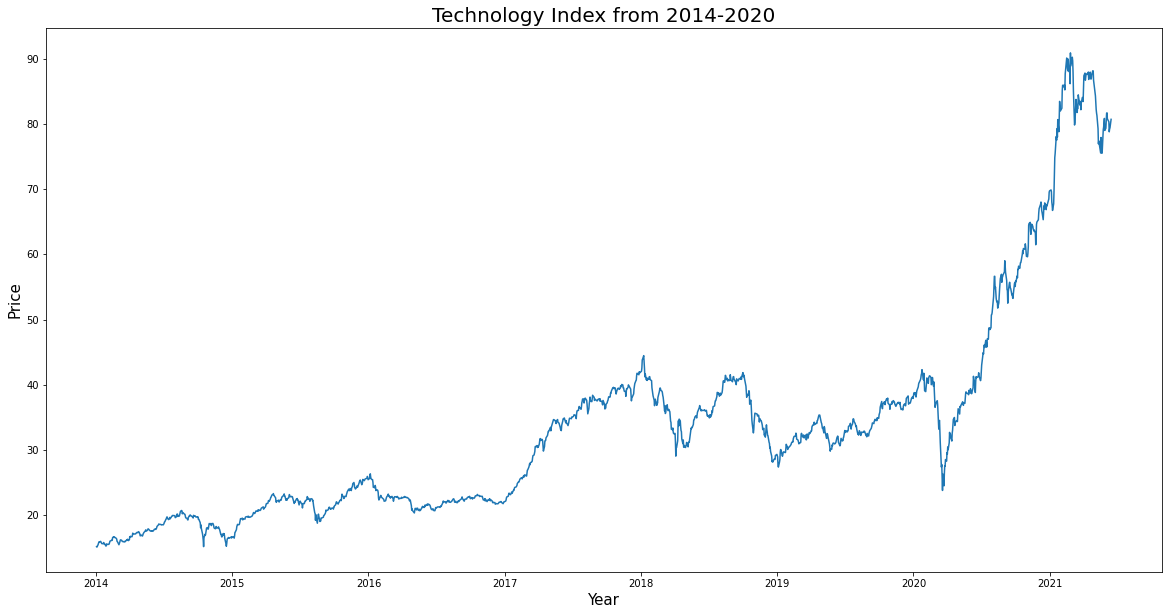

In [49]:
tech_index['Date'] = pd.to_datetime(tech_index['Date'])
#Trendline for KLCI
plt.figure(figsize=(20,10))
sns.lineplot(x=tech_index.Date,y=tech_index.Price)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.title('Technology Index from 2014-2020',fontsize=20)

**TECHNOLOGY STOCK **

**TOP 5 STOCK FROM TECHNOLOGY**

1.GREATEC

2.INARI

3.MI

4.MYEG

5.UNISEM


In [50]:

#INARI
INARI = bursa[bursa['Stock']=='INARI']
#MI
MI = bursa[bursa['Stock']=='MI']
#MYEG
MYEG = bursa[bursa['Stock']=='MYEG']
#UNISEM
UNISEM = bursa[bursa['Stock']=='UNISEM']

**INARI**

In [51]:
inari = df[df['stock_name'].str.contains('INARI')].sort_values(by=['qrd'],ascending=1)
inari

,company,stock_name,fye,qtr,qrd,date_announced,cipr,pipr,ccpr,pcpr,cippl,pippl,ccppl,pcppl,cipplt,pipplt,ccpplt,pcpplt,ref,Year,Year_ann
4584,INARI BERHAD,INARI,2011-06-30,3,2011-03-31,2011-07-14,35826000000,0.000000e+00,76962000000,0.000000e+00,3.045000e+09,0.000000e+00,1.522400e+10,0.000000e+00,2.634000e+09,0.000000e+00,1.465000e+10,0.000000e+00,600183,2011,2011
4401,SINARIA CORPORATION BERHAD,SINARIA,2013-05-31,3,2013-02-28,2013-04-23,35851000000,3.195600e+10,106802000000,9.061200e+10,2.980000e+08,7.400000e+07,8.190000e+08,2.257000e+09,1.090000e+08,3.600000e+07,5.470000e+08,1.498000e+09,599062,2013,2013
4601,INARI BERHAD,INARI,2013-06-30,3,2013-03-31,2013-05-16,56776000000,4.383800e+10,173479000000,1.389760e+11,8.324000e+09,4.729000e+09,2.975200e+10,1.645900e+10,1.243700e+10,4.009000e+09,2.847500e+10,1.415500e+10,600279,2013,2013
5995,INARI AMERTRON BERHAD,INARI,2014-06-30,1,2013-09-30,2013-11-26,191339000000,5.464600e+10,191339000000,5.464600e+10,2.206600e+10,1.015800e+10,2.206600e+10,1.015800e+10,2.087400e+10,7.385000e+09,2.087400e+10,7.385000e+09,2262155,2014,2013
6992,INARI AMERTRON BERHAD,INARI,2016-06-30,2,2015-12-31,2016-02-23,293640000000,2.279120e+11,568589000000,4.497950e+11,4.483800e+10,3.998900e+10,8.877400e+10,7.393700e+10,4.284500e+10,3.932700e+10,8.533400e+10,7.293300e+10,2649121,2016,2016
7725,INARI AMERTRON BERHAD,INARI,2017-06-30,3,2017-03-31,2017-05-16,274033000000,2.173210e+11,830661000000,7.859100e+11,5.427700e+10,2.303100e+10,1.686050e+11,1.118050e+11,5.216200e+10,2.274300e+10,1.626680e+11,1.080770e+11,2759672,2017,2017
8232,INARI AMERTRON BERHAD,INARI,2018-06-30,2,2017-12-31,2018-02-27,375964000000,2.750510e+11,749053000000,5.566280e+11,7.790300e+10,6.436300e+10,1.515710e+11,1.143280e+11,6.906800e+10,6.235400e+10,1.377630e+11,1.105060e+11,2833206,2018,2018


**REVENUE**

Text(0.5, 0.98, 'Revenue')

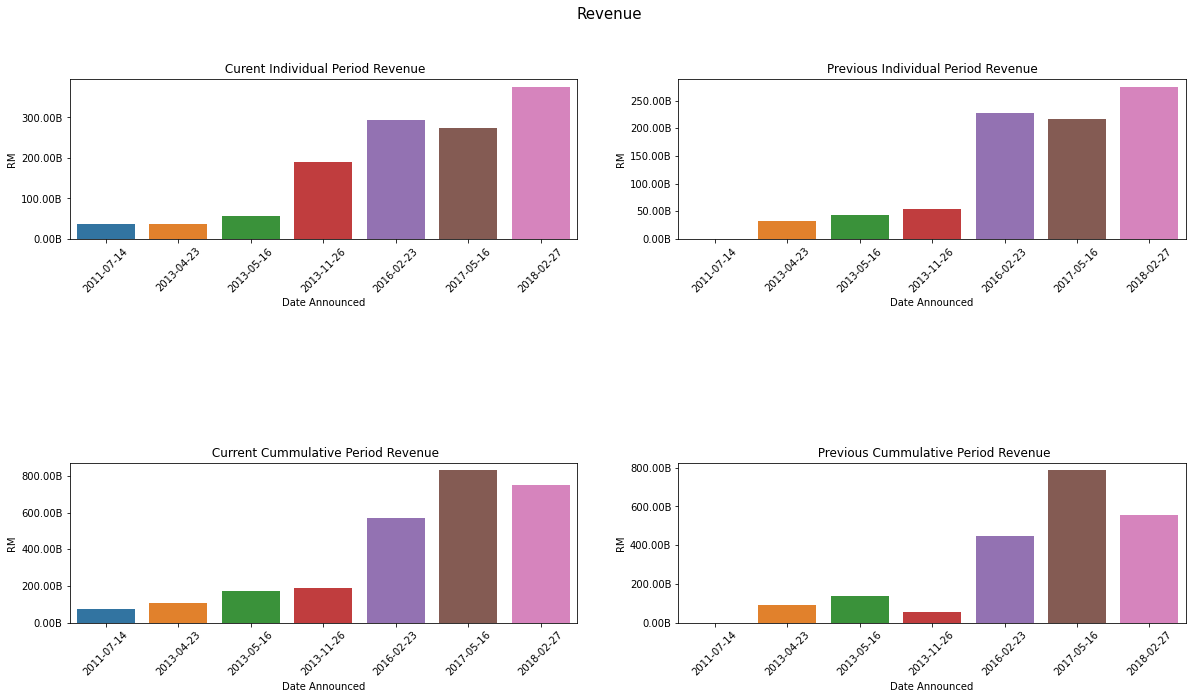

In [52]:
#revenue for INARI
plt.figure(figsize=(20,10))

plt.subplot(3,2,1)
x = sns.barplot(x = inari.date_announced.dt.date, y= inari.cipr)
plt.title(' Curent Individual Period Revenue')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,2)
x = sns.barplot(x = inari.date_announced.dt.date, y= inari.pipr)
plt.title('Previous Individual Period Revenue')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,5)
x = sns.barplot(x = inari.date_announced.dt.date, y= inari.ccpr)
plt.title(' Current Cummulative Period Revenue')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,6)
x = sns.barplot(x = inari.date_announced.dt.date, y= inari.pcpr)
plt.title(' Previous Cummulative Period Revenue')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.suptitle('Revenue',fontsize=15)


**PROFIT LOSS BEFORE TAX**

Text(0.5, 0.98, 'Profit/Loss Before tax')

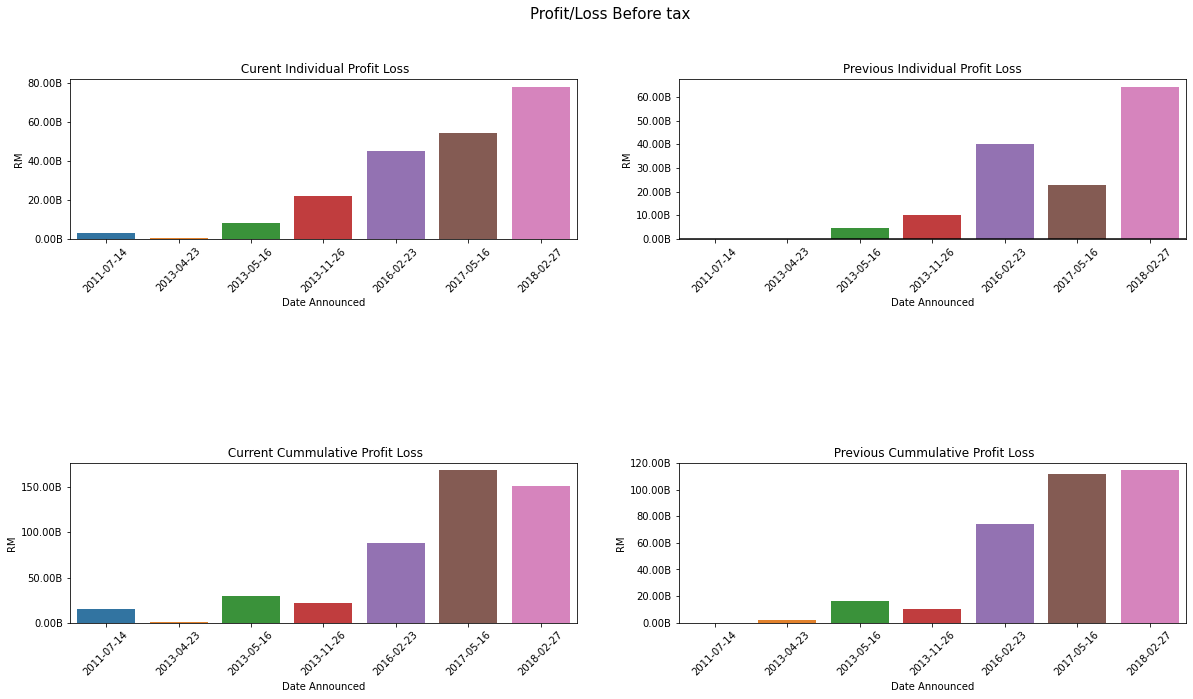

In [53]:
plt.figure(figsize=(20,10))

plt.subplot(3,2,1)
x = sns.barplot(x = inari.date_announced.dt.date, y= inari.cippl)
plt.title(' Curent Individual Profit Loss')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,2)
x = sns.barplot(x = inari.date_announced.dt.date, y= inari.pippl)
plt.title('Previous Individual Profit Loss')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
plt.axhline(y=0, linestyle = 'solid', color= 'black')
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,5)
x = sns.barplot(x = inari.date_announced.dt.date, y= inari.ccppl)
plt.title(' Current Cummulative Profit Loss')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,6)
x = sns.barplot(x = inari.date_announced.dt.date, y= inari.pcppl)
plt.title(' Previous Cummulative Profit Loss')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.suptitle('Profit/Loss Before tax',fontsize=15)

### Profit/Loss after tax

Text(0.5, 0.98, 'Profit/Loss After tax')

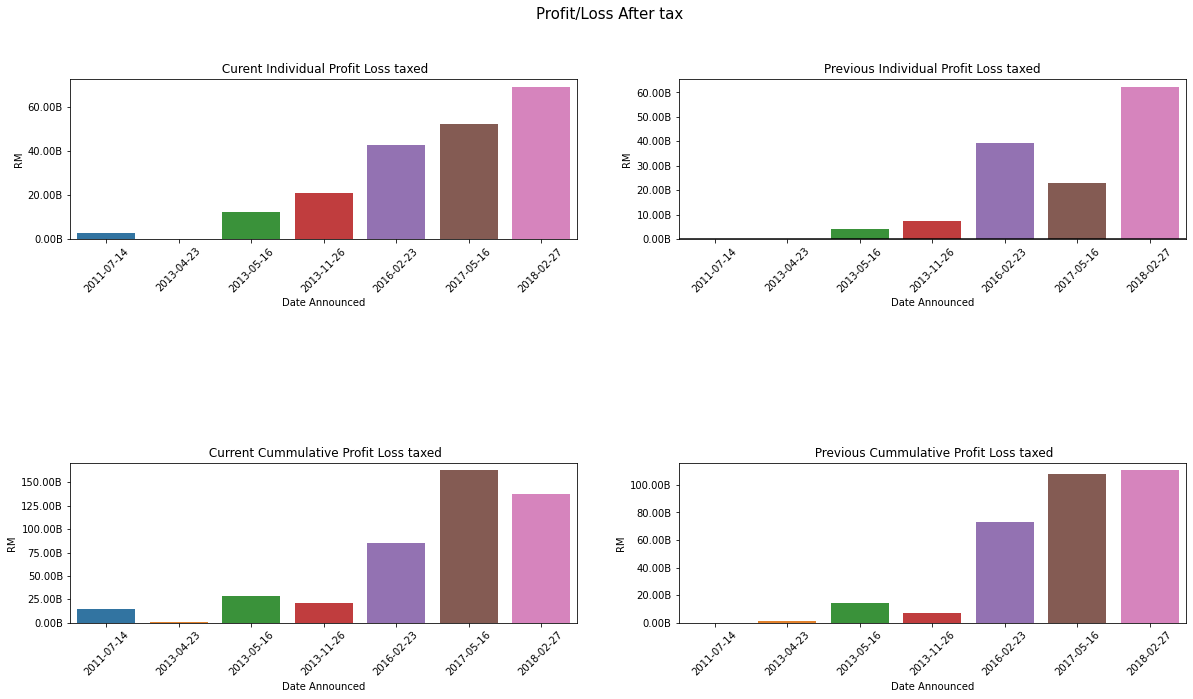

In [54]:
plt.figure(figsize=(20,10))

plt.subplot(3,2,1)
x = sns.barplot(x = inari.date_announced.dt.date, y= inari.cipplt)
plt.title(' Curent Individual Profit Loss taxed')
plt.xlabel('Date Announced')
plt.ylabel('RM')
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)
plt.xticks(rotation =45)

plt.subplot(3,2,2)
x = sns.barplot(x = inari.date_announced.dt.date, y= inari.pipplt)
plt.title('Previous Individual Profit Loss taxed')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
plt.axhline(y=0, linestyle = 'solid', color= 'black')
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,5)
x = sns.barplot(x = inari.date_announced.dt.date, y= inari.ccpplt)
plt.title(' Current Cummulative Profit Loss taxed')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,6)
x = sns.barplot(x = inari.date_announced.dt.date, y= inari.pcpplt)
plt.title(' Previous Cummulative Profit Loss taxed')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.suptitle('Profit/Loss After tax',fontsize=15)

In [55]:
INARI

,Code,Stock,Date,Close
1476319,166,INARI,2011-07-19,0.112372
1476320,166,INARI,2011-07-20,0.119948
1476321,166,INARI,2011-07-21,0.111110
1476322,166,INARI,2011-07-22,0.109847
1476323,166,INARI,2011-07-25,0.108584
...,...,...,...,...
1478740,166,INARI,2021-05-11,3.030000
1478741,166,INARI,2021-05-12,3.040000
1478742,166,INARI,2021-05-17,3.000000
1478743,166,INARI,2021-05-18,3.080000


In [56]:
INARI= INARI[(INARI['Date'] >= datetime.datetime(2005,1,1)) & (INARI['Date'] <= datetime.datetime(2018,12,31))]
INARI

,Code,Stock,Date,Close
1476319,166,INARI,2011-07-19,0.112372
1476320,166,INARI,2011-07-20,0.119948
1476321,166,INARI,2011-07-21,0.111110
1476322,166,INARI,2011-07-22,0.109847
1476323,166,INARI,2011-07-25,0.108584
...,...,...,...,...
1478155,166,INARI,2018-12-24,1.500000
1478156,166,INARI,2018-12-26,1.430000
1478157,166,INARI,2018-12-27,1.480000
1478158,166,INARI,2018-12-28,1.480000


### INARI  and TECHNOLOGY Index Movement Prior To Announcement Date of Finacial Report 

In [57]:
start = datetime.datetime(2004,1,1)
end = datetime.datetime(2021,6,14)

INARI = web.DataReader('0166.KL','yahoo',start,end).reset_index()
INARI

,Date,High,Low,Open,Close,Volume,Adj Close
0,2011-07-19,0.113635,0.099746,0.103534,0.112372,177770439.0,0.079986
1,2011-07-20,0.121210,0.111110,0.112372,0.119948,83915174.0,0.085378
2,2011-07-21,0.119948,0.109847,0.119948,0.111110,23705576.0,0.079087
3,2011-07-22,0.112372,0.106059,0.111110,0.109847,10100075.0,0.078188
4,2011-07-25,0.109847,0.104796,0.109847,0.108584,11852392.0,0.077289
...,...,...,...,...,...,...,...
2437,2021-06-09,3.150000,3.100000,3.150000,3.110000,5475400.0,3.110000
2438,2021-06-10,3.200000,3.130000,3.130000,3.180000,3683400.0,3.180000
2439,2021-06-11,3.180000,3.110000,3.180000,3.140000,4307000.0,3.140000
2440,2021-06-14,3.170000,3.130000,3.140000,3.140000,6064000.0,3.140000


Text(0.5, 0.98, 'INARI and TECHNOLOGY Index 2014-2021')

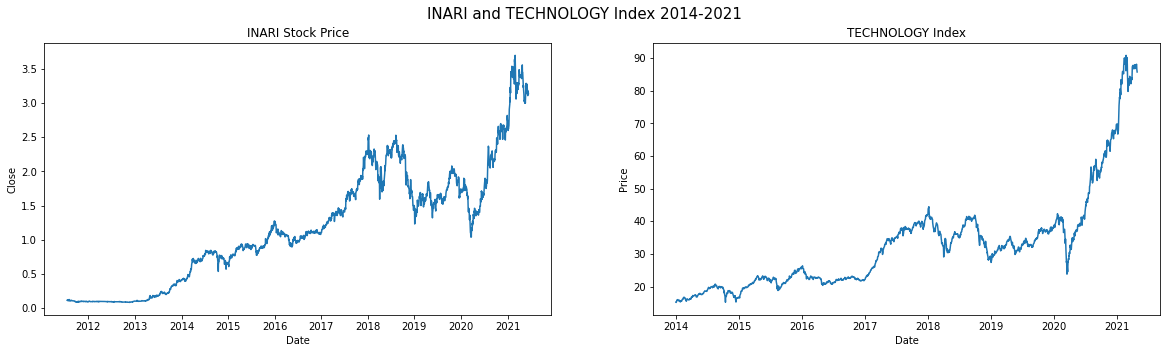

In [58]:
INARI= INARI[(INARI['Date'] >= datetime.datetime(2005,1,1)) & (INARI['Date'] <= datetime.datetime(2021,6,14))]
INARI
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.lineplot(x= INARI.Date , y= INARI.Close)
plt.title('INARI Stock Price')

KLCIM = tech_index[(tech_index['Date'] >= datetime.datetime(2005,1,1)) & (tech_index['Date'] <= datetime.datetime(2021,5,1))]
plt.subplot(1,2,2)
sns.lineplot(x= KLCIM.Date, y= KLCIM.Price)
plt.title('TECHNOLOGY Index')
plt.suptitle('INARI and TECHNOLOGY Index 2014-2021',fontsize=15)

In [59]:
INARI.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2441.000000,2441.000000,2441.000000,2441.000000,2.441000e+03,2441.000000
mean,1.203058,1.165717,1.184462,1.184450,1.053753e+07,1.090306
std,0.865742,0.837873,0.851910,0.851637,1.205960e+07,0.831844
min,0.082069,0.080807,0.082069,0.080807,0.000000e+00,0.064625
25%,0.416662,0.406561,0.411612,0.414137,3.773400e+06,0.348308
50%,1.106666,1.076666,1.093333,1.093333,8.107500e+06,0.955313
75%,1.760000,1.710000,1.733333,1.730000,1.381450e+07,1.635656
max,3.750000,3.660000,3.720000,3.700000,2.794925e+08,3.650335


In [60]:
INARI[INARI['Close']==0.080807]

,Date,High,Low,Open,Close,Volume,Adj Close


In [61]:
KLCIM.describe()

,Price,Open,High,Low
count,1800.000000,1800.000000,1800.000000,1800.000000
mean,32.864278,32.859372,33.124128,32.584572
std,15.451347,15.445826,15.608398,15.276074
min,15.130000,15.160000,15.250000,15.060000
25%,22.030000,22.047500,22.150000,21.937500
50%,31.400000,31.410000,31.625000,31.155000
75%,37.692500,37.702500,37.975000,37.462500
max,90.860000,90.850000,91.860000,89.840000


In [62]:
KLCIM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1800 entries, 1767 to 172
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1800 non-null   datetime64[ns]
 1   Price     1800 non-null   float64       
 2   Open      1800 non-null   float64       
 3   High      1800 non-null   float64       
 4   Low       1800 non-null   float64       
 5   Vol.      1800 non-null   object        
 6   Change %  1800 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 112.5+ KB


In [63]:
KLCIM[KLCIM['Price']==15.130000] # 2014 (2014-2016 market jatuh)

,Date,Price,Open,High,Low,Vol.,Change %
1825,2014-01-03,15.13,15.25,15.25,15.06,20.65M,-0.39%


In [64]:
inari

,company,stock_name,fye,qtr,qrd,date_announced,cipr,pipr,ccpr,pcpr,cippl,pippl,ccppl,pcppl,cipplt,pipplt,ccpplt,pcpplt,ref,Year,Year_ann
4584,INARI BERHAD,INARI,2011-06-30,3,2011-03-31,2011-07-14,35826000000,0.000000e+00,76962000000,0.000000e+00,3.045000e+09,0.000000e+00,1.522400e+10,0.000000e+00,2.634000e+09,0.000000e+00,1.465000e+10,0.000000e+00,600183,2011,2011
4401,SINARIA CORPORATION BERHAD,SINARIA,2013-05-31,3,2013-02-28,2013-04-23,35851000000,3.195600e+10,106802000000,9.061200e+10,2.980000e+08,7.400000e+07,8.190000e+08,2.257000e+09,1.090000e+08,3.600000e+07,5.470000e+08,1.498000e+09,599062,2013,2013
4601,INARI BERHAD,INARI,2013-06-30,3,2013-03-31,2013-05-16,56776000000,4.383800e+10,173479000000,1.389760e+11,8.324000e+09,4.729000e+09,2.975200e+10,1.645900e+10,1.243700e+10,4.009000e+09,2.847500e+10,1.415500e+10,600279,2013,2013
5995,INARI AMERTRON BERHAD,INARI,2014-06-30,1,2013-09-30,2013-11-26,191339000000,5.464600e+10,191339000000,5.464600e+10,2.206600e+10,1.015800e+10,2.206600e+10,1.015800e+10,2.087400e+10,7.385000e+09,2.087400e+10,7.385000e+09,2262155,2014,2013
6992,INARI AMERTRON BERHAD,INARI,2016-06-30,2,2015-12-31,2016-02-23,293640000000,2.279120e+11,568589000000,4.497950e+11,4.483800e+10,3.998900e+10,8.877400e+10,7.393700e+10,4.284500e+10,3.932700e+10,8.533400e+10,7.293300e+10,2649121,2016,2016
7725,INARI AMERTRON BERHAD,INARI,2017-06-30,3,2017-03-31,2017-05-16,274033000000,2.173210e+11,830661000000,7.859100e+11,5.427700e+10,2.303100e+10,1.686050e+11,1.118050e+11,5.216200e+10,2.274300e+10,1.626680e+11,1.080770e+11,2759672,2017,2017
8232,INARI AMERTRON BERHAD,INARI,2018-06-30,2,2017-12-31,2018-02-27,375964000000,2.750510e+11,749053000000,5.566280e+11,7.790300e+10,6.436300e+10,1.515710e+11,1.143280e+11,6.906800e+10,6.235400e+10,1.377630e+11,1.105060e+11,2833206,2018,2018


**2015-12-31 - 2016-06-30( Q2)**

In [65]:
tech_index['Date'] = pd.to_datetime(tech_index['Date'])
tech_index.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1827 entries, 1767 to 172
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1827 non-null   datetime64[ns]
 1   Price     1827 non-null   float64       
 2   Open      1827 non-null   float64       
 3   High      1827 non-null   float64       
 4   Low       1827 non-null   float64       
 5   Vol.      1827 non-null   object        
 6   Change %  1827 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 114.2+ KB


In [66]:
type(tech_index.loc[0,'Date'])

pandas._libs.tslibs.timestamps.Timestamp

Text(0.5, 0.98, 'INARI and TECHNOLOGY in  2017,5,16')

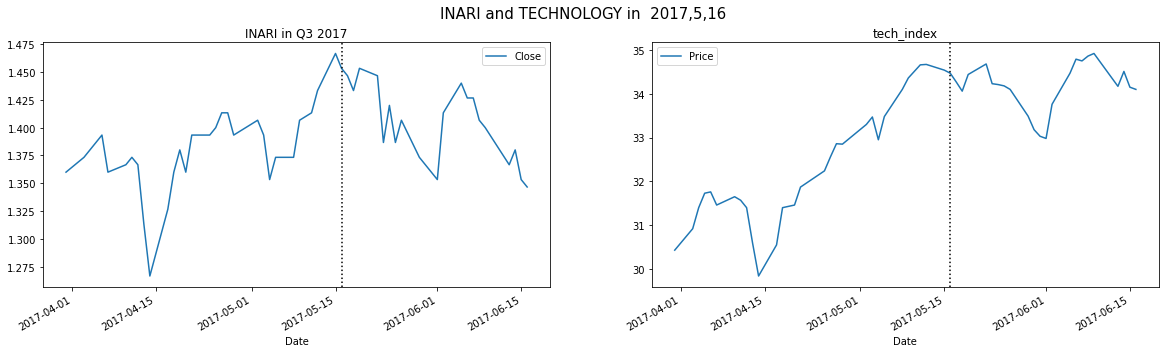

In [75]:
#plt.figure(figsize=(20,10))
#type(tech_index.loc[0,'Date'])
fig,axes = plt.subplots(figsize=(20,5),nrows=1, ncols=2)

INARI[(INARI['Date'] >= datetime.datetime(2017,3,31)) & (INARI['Date'] <= datetime.datetime(2017,6,16))].plot.line(x='Date',y='Close',ax=axes[0],title ='INARI in Q3 2017')
axes[0].axvline(x= datetime.datetime(2017,5,16),linestyle = 'dotted',color='black')


tech_index[(tech_index['Date'] >= datetime.datetime(2017,3,31)) & (tech_index['Date'] <= datetime.datetime(2017,6,16))].plot.line(x='Date',y='Price',ax=axes[1],title = 'tech_index')
axes[1].axvline(x= datetime.datetime(2017,5,16),linestyle = 'dotted',color='black')
plt.suptitle('INARI and TECHNOLOGY in  2017,5,16',fontsize=15)

Text(0.5, 0.98, 'INARI and TECHNOLOGY in  2016-2-23 ')

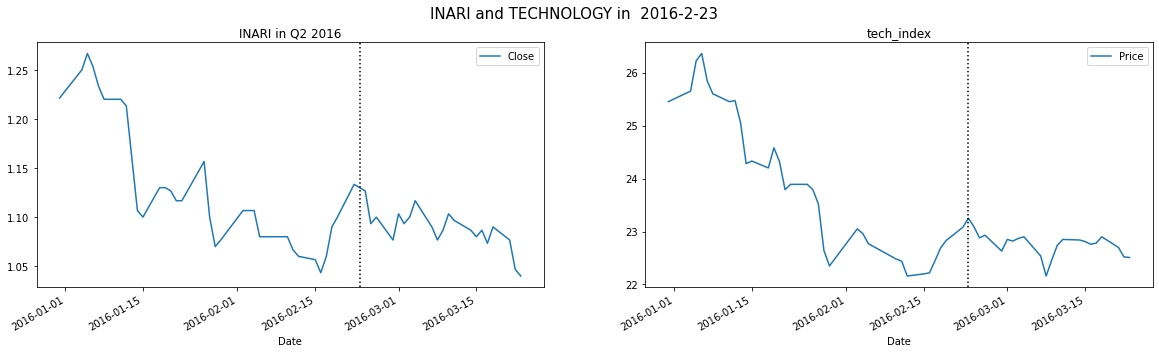

In [74]:
#plt.figure(figsize=(20,10))
#type(tech_index.loc[0,'Date'])
fig,axes = plt.subplots(figsize=(20,5),nrows=1, ncols=2)

INARI[(INARI['Date'] >= datetime.datetime(2015,12,31)) & (INARI['Date'] <= datetime.datetime(2016,3,23))].plot.line(x='Date',y='Close',ax=axes[0],title ='INARI in Q2 2016')
axes[0].axvline(x= datetime.datetime(2016,2,23),linestyle = 'dotted',color='black')

tech_index[(tech_index['Date'] >= datetime.datetime(2015,12,31)) & (tech_index['Date'] <= datetime.datetime(2016,3,23))].plot.line(x='Date',y='Price',ax=axes[1],title = 'tech_index')
axes[1].axvline(x= datetime.datetime(2016,2,23),linestyle = 'dotted',color='black')
plt.suptitle('INARI and TECHNOLOGY in  2016-2-23 ',fontsize=15)

Text(0.5, 0.98, 'INARI and TECHNOLOGY in 2018,2,27 ')

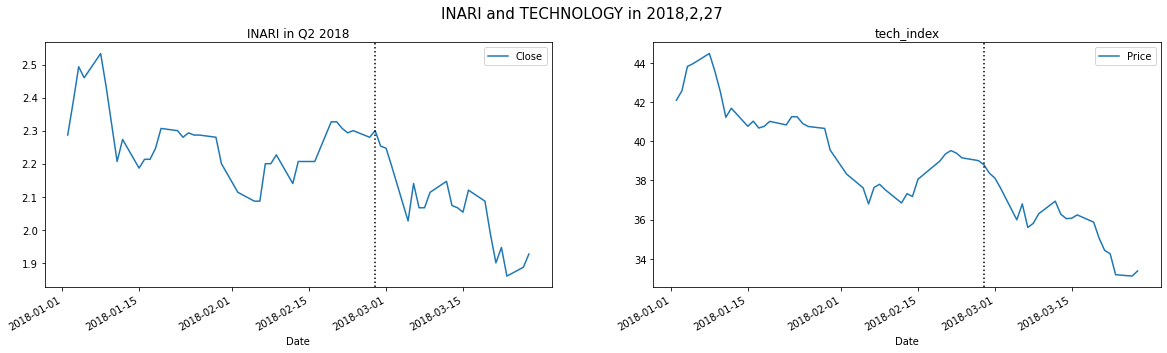

In [76]:
#plt.figure(figsize=(20,10))
#type(tech_index.loc[0,'Date'])
fig,axes = plt.subplots(figsize=(20,5),nrows=1, ncols=2)

INARI[(INARI['Date'] >= datetime.datetime(2017,12,31)) & (INARI['Date'] <= datetime.datetime(2018,3,27))].plot.line(x='Date',y='Close',ax=axes[0],title ='INARI in Q2 2018')
axes[0].axvline(x= datetime.datetime(2018,2,27),linestyle = 'dotted',color='black')

tech_index[(tech_index['Date'] >= datetime.datetime(2017,12,31)) & (tech_index['Date'] <= datetime.datetime(2018,3,27))].plot.line(x='Date',y='Price',ax=axes[1],title = 'tech_index')
axes[1].axvline(x= datetime.datetime(2018,2,27),linestyle = 'dotted',color='black')
plt.suptitle('INARI and TECHNOLOGY in 2018,2,27 ',fontsize=15)

In [68]:
tech_index.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1827 entries, 1767 to 172
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1827 non-null   datetime64[ns]
 1   Price     1827 non-null   float64       
 2   Open      1827 non-null   float64       
 3   High      1827 non-null   float64       
 4   Low       1827 non-null   float64       
 5   Vol.      1827 non-null   object        
 6   Change %  1827 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 194.2+ KB


In [ ]:
tech_index

,Date,Price,Open,High,Low,Vol.,Change %
1767,2014-04-01,16.73,16.28,16.77,16.27,143.80M,2.95%
1521,2015-04-01,21.57,21.36,21.57,21.35,96.82M,1.17%
1273,2016-04-01,22.66,22.69,22.72,22.62,17.88M,-0.04%
541,2019-04-01,32.79,32.63,32.81,32.42,150.56M,0.83%
293,2020-04-01,29.36,29.46,30.68,29.31,528.87M,-0.78%
...,...,...,...,...,...,...,...
1644,2014-09-30,19.70,19.77,19.80,19.66,86.42M,-0.35%
1397,2015-09-30,21.27,20.97,21.28,20.97,31.08M,1.53%
1150,2016-09-30,22.55,22.78,22.85,22.51,45.58M,-1.05%
421,2019-09-30,34.86,34.87,35.14,34.54,63.62M,-0.03%


In [77]:
unisem = df[df['stock_name'].str.contains('UNISEM')].sort_values(by=['qrd'],ascending=1)
unisem

,company,stock_name,fye,qtr,qrd,date_announced,cipr,pipr,ccpr,pcpr,cippl,pippl,ccppl,pcppl,cipplt,pipplt,ccpplt,pcpplt,ref,Year,Year_ann
134,UNISEM (M) BERHAD,UNISEM,2004-12-31,4,2004-12-31,2005-02-17,120710000000,9.506400e+10,493900000000,2.816040e+11,-1.857000e+09,9.232000e+09,3.363300e+10,-4.008000e+09,5.680000e+08,8.933000e+09,3.427700e+10,-3.307000e+09,568685,2004,2005
687,UNISEM (M) BERHAD,UNISEM,2005-12-31,4,2005-12-31,2006-03-06,167854000000,1.207100e+11,568976000000,4.939000e+11,1.848100e+10,-1.857000e+09,3.985500e+10,3.363300e+10,1.208900e+10,5.680000e+08,2.232300e+10,3.427700e+10,574512,2005,2006
715,UNISEM (M) BERHAD,UNISEM,2005-09-30,3,2005-12-31,2005-10-19,154586000000,1.511580e+11,401122000000,3.736290e+11,2.022600e+10,1.523600e+10,2.137500e+10,3.549000e+10,1.373200e+10,9.059000e+09,1.023500e+10,3.370800e+10,574688,2005,2005
1035,UNISEM (M) BERHAD,UNISEM,2006-03-31,1,2006-12-31,2006-05-08,170041000000,1.143080e+11,170041000000,1.143080e+11,2.874100e+10,-3.883000e+09,2.874100e+10,-3.883000e+09,2.185700e+10,-5.169000e+09,2.185700e+10,-5.169000e+09,576885,2006,2006
1825,UNISEM (M) BERHAD,UNISEM,2008-12-31,4,2008-12-31,2009-02-26,267366000000,3.598910e+11,1233381000000,9.724830e+11,-5.338100e+10,5.494000e+10,2.399200e+10,1.177380e+11,-5.317700e+10,5.859900e+10,1.833600e+10,1.196130e+11,581799,2008,2009
5038,UNISEM (M) BERHAD,UNISEM,2011-12-31,4,2011-12-31,2012-02-21,273180000000,3.356300e+11,1160863000000,1.395078e+12,-5.260000e+09,3.877300e+10,1.425500e+10,1.932890e+11,-2.648000e+09,4.167500e+10,1.958100e+10,1.829580e+11,603146,2011,2012
4645,UNISEM (M) BERHAD,UNISEM,2013-12-31,2,2013-06-30,2013-07-24,246931000000,2.829450e+11,496654000000,5.395560e+11,-1.281000e+09,-8.242000e+09,-1.160400e+10,-2.448200e+10,-4.769000e+09,-7.762000e+09,-1.505200e+10,-2.144800e+10,600575,2013,2013
7407,UNISEM (M) BERHAD,UNISEM,2016-12-31,3,2016-09-30,2016-11-03,321950000000,3.296100e+11,960648000000,9.084570e+11,4.411500e+10,4.622700e+10,1.243510e+11,1.081290e+11,3.880900e+10,4.065500e+10,1.118300e+11,9.613600e+10,2712785,2016,2016
8282,UNISEM (M) BERHAD,UNISEM,2018-12-31,1,2018-03-31,2018-04-24,321551000000,3.602480e+11,321551000000,3.602480e+11,7.712000e+09,5.086200e+10,7.712000e+09,5.086200e+10,6.325000e+09,4.537900e+10,6.325000e+09,4.537900e+10,2850178,2018,2018


Text(0.5, 0.98, 'Revenue')

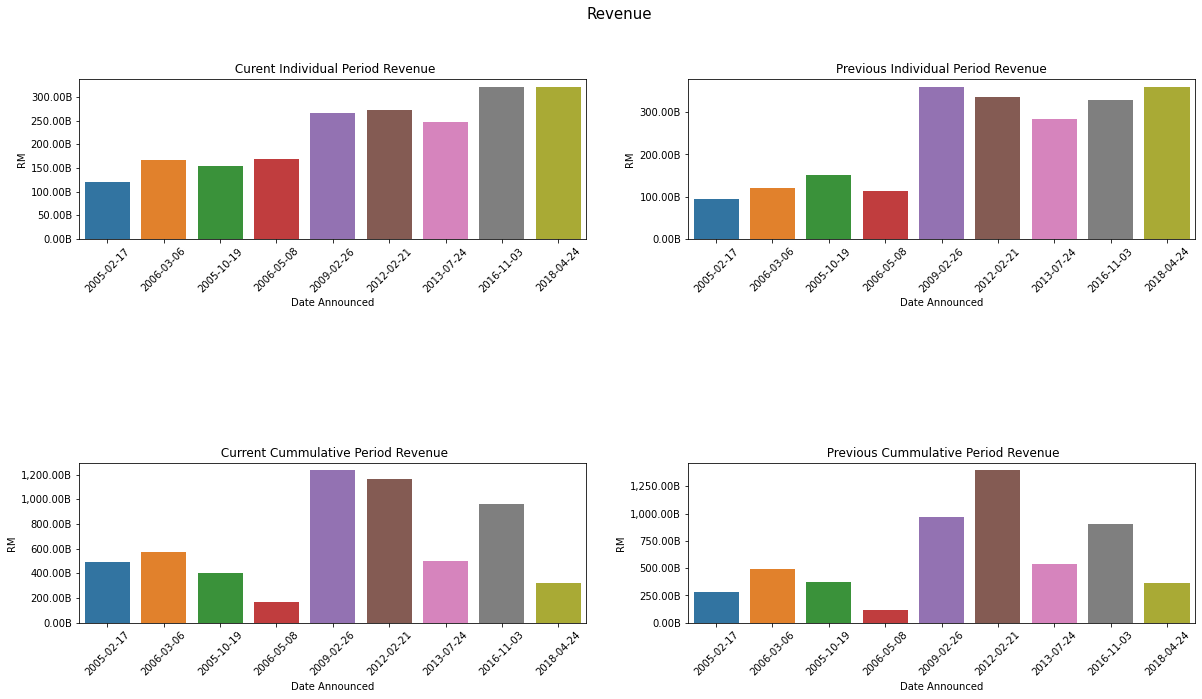

In [78]:
plt.figure(figsize=(20,10))

plt.subplot(3,2,1)
x = sns.barplot(x = unisem.date_announced.dt.date, y= unisem.cipr)
plt.title(' Curent Individual Period Revenue')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,2)
x = sns.barplot(x = unisem.date_announced.dt.date, y= unisem.pipr)
plt.title('Previous Individual Period Revenue')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,5)
x = sns.barplot(x = unisem.date_announced.dt.date, y= unisem.ccpr)
plt.title(' Current Cummulative Period Revenue')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,6)
x = sns.barplot(x = unisem.date_announced.dt.date, y= unisem.pcpr)
plt.title(' Previous Cummulative Period Revenue')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.suptitle('Revenue',fontsize=15)

**PROFIT LOSS BEFORE TAX**

Text(0.5, 0.98, 'Profit/Loss Before tax')

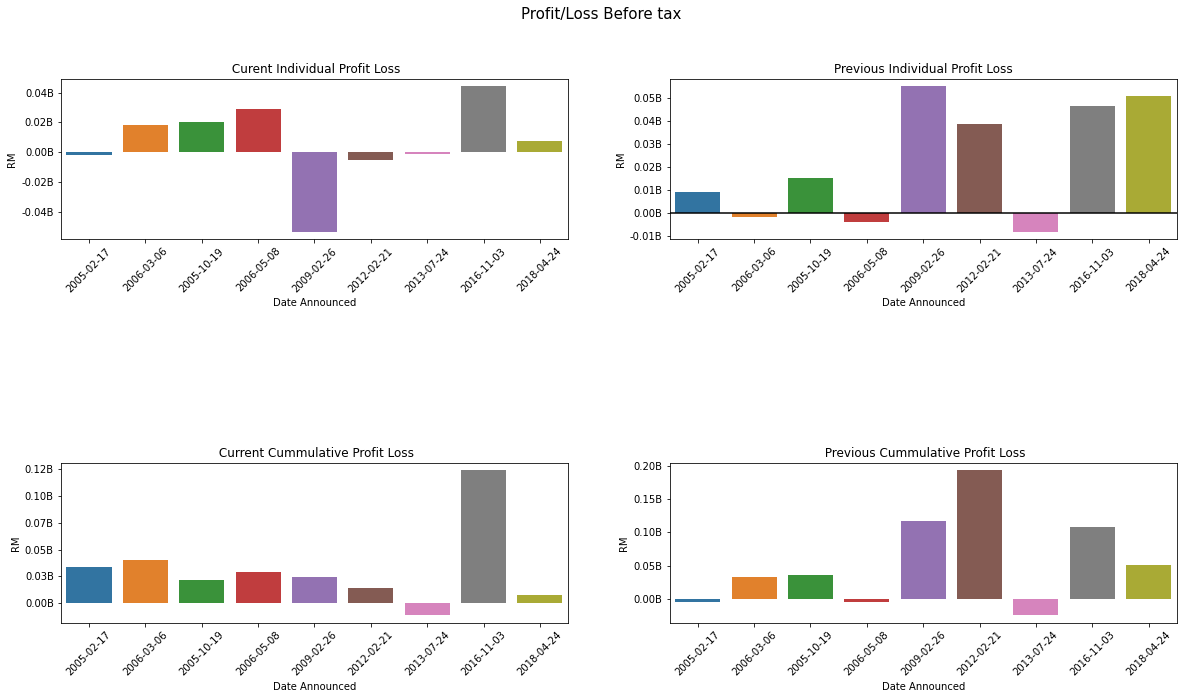

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(3,2,1)
x = sns.barplot(x = unisem.date_announced.dt.date, y= unisem.cippl)
plt.title(' Curent Individual Profit Loss')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,2)
x = sns.barplot(x = unisem.date_announced.dt.date, y= unisem.pippl)
plt.title('Previous Individual Profit Loss')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
plt.axhline(y=0, linestyle = 'solid', color= 'black')
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,5)
x = sns.barplot(x = unisem.date_announced.dt.date, y= unisem.ccppl)
plt.title(' Current Cummulative Profit Loss')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,6)
x = sns.barplot(x = unisem.date_announced.dt.date, y= unisem.pcppl)
plt.title(' Previous Cummulative Profit Loss')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.suptitle('Profit/Loss Before tax',fontsize=15)

** Profit/Loss after tax**

Text(0.5, 0.98, 'Profit/Loss After tax')

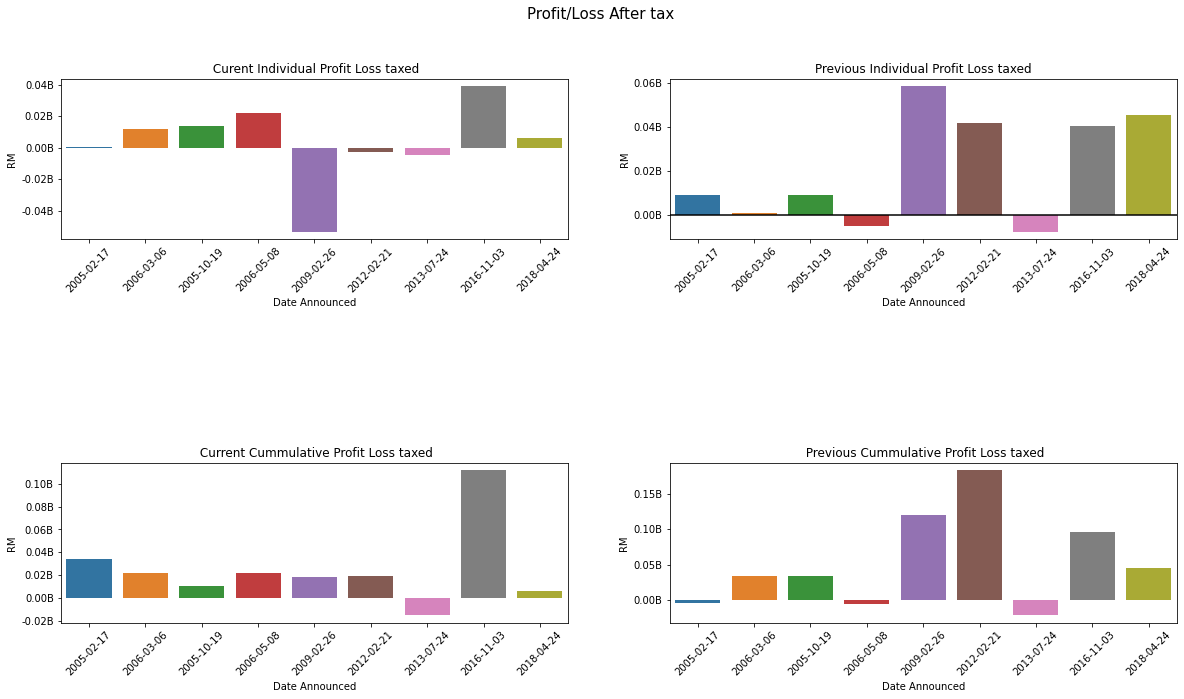

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(3,2,1)
x = sns.barplot(x = unisem.date_announced.dt.date, y= unisem.cipplt)
plt.title(' Curent Individual Profit Loss taxed')
plt.xlabel('Date Announced')
plt.ylabel('RM')
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)
plt.xticks(rotation =45)

plt.subplot(3,2,2)
x = sns.barplot(x = unisem.date_announced.dt.date, y= unisem.pipplt)
plt.title('Previous Individual Profit Loss taxed')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
plt.axhline(y=0, linestyle = 'solid', color= 'black')
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,5)
x = sns.barplot(x = unisem.date_announced.dt.date, y= unisem.ccpplt)
plt.title(' Current Cummulative Profit Loss taxed')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,6)
x = sns.barplot(x = unisem.date_announced.dt.date, y= unisem.pcpplt)
plt.title(' Previous Cummulative Profit Loss taxed')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.suptitle('Profit/Loss After tax',fontsize=15)

**unisem and KLCI Index movement prior to announcement date of Financial Report**

In [ ]:
UNISEM

,Code,Stock,Date,Close
3590876,5005,UNISEM,2000-01-03,8.666666
3590877,5005,UNISEM,2000-01-04,8.750000
3590878,5005,UNISEM,2000-01-05,8.750000
3590879,5005,UNISEM,2000-01-06,8.750000
3590880,5005,UNISEM,2000-01-07,8.750000
...,...,...,...,...
3596236,5005,UNISEM,2021-05-11,7.120000
3596237,5005,UNISEM,2021-05-12,7.150000
3596238,5005,UNISEM,2021-05-17,6.900000
3596239,5005,UNISEM,2021-05-18,6.970000


Text(0.5, 0.98, 'UNISEM and TECH INDEX 2006-2021')

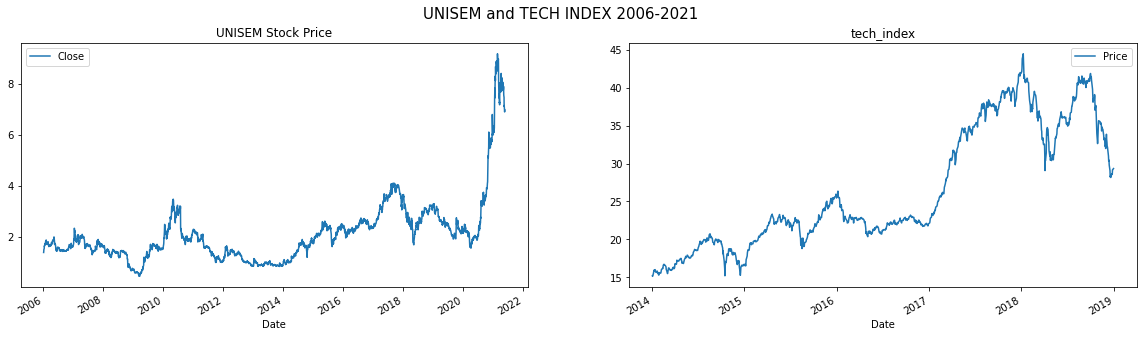

In [ ]:
fig, axes = plt.subplots(figsize=(20,5),nrows=1, ncols=2)


UNISEM[(UNISEM['Date'] >= datetime.datetime(2006,1,1)) & (UNISEM['Date'] <= datetime.datetime(2021,6,6))].plot.line(x='Date',y='Close',ax=axes[0],title ='UNISEM Stock Price')

tech_index[(tech_index['Date'] >= datetime.datetime(2006,1,1)) & (tech_index['Date'] <= datetime.datetime(2018,12,31))].plot.line(x='Date',y='Price',ax=axes[1],title = 'tech_index')
plt.suptitle('UNISEM and TECH INDEX 2006-2021',fontsize=15)

In [ ]:
unisem


,company,stock_name,fye,qtr,qrd,date_announced,cipr,pipr,ccpr,pcpr,cippl,pippl,ccppl,pcppl,cipplt,pipplt,ccpplt,pcpplt,ref,Year,Year_ann
134,UNISEM (M) BERHAD,UNISEM,2004-12-31,4,2004-12-31,2005-02-17,120710000,95064000.0,493900000,2.816040e+08,-1857000.0,9232000.0,33633000.0,-4008000.0,568000.0,8933000.0,34277000.0,-3307000.0,568685,2004,2005
687,UNISEM (M) BERHAD,UNISEM,2005-12-31,4,2005-12-31,2006-03-06,167854000,120710000.0,568976000,4.939000e+08,18481000.0,-1857000.0,39855000.0,33633000.0,12089000.0,568000.0,22323000.0,34277000.0,574512,2005,2006
715,UNISEM (M) BERHAD,UNISEM,2005-09-30,3,2005-12-31,2005-10-19,154586000,151158000.0,401122000,3.736290e+08,20226000.0,15236000.0,21375000.0,35490000.0,13732000.0,9059000.0,10235000.0,33708000.0,574688,2005,2005
1035,UNISEM (M) BERHAD,UNISEM,2006-03-31,1,2006-12-31,2006-05-08,170041000,114308000.0,170041000,1.143080e+08,28741000.0,-3883000.0,28741000.0,-3883000.0,21857000.0,-5169000.0,21857000.0,-5169000.0,576885,2006,2006
1825,UNISEM (M) BERHAD,UNISEM,2008-12-31,4,2008-12-31,2009-02-26,267366000,359891000.0,1233381000,9.724830e+08,-53381000.0,54940000.0,23992000.0,117738000.0,-53177000.0,58599000.0,18336000.0,119613000.0,581799,2008,2009
5038,UNISEM (M) BERHAD,UNISEM,2011-12-31,4,2011-12-31,2012-02-21,273180000,335630000.0,1160863000,1.395078e+09,-5260000.0,38773000.0,14255000.0,193289000.0,-2648000.0,41675000.0,19581000.0,182958000.0,603146,2011,2012
4645,UNISEM (M) BERHAD,UNISEM,2013-12-31,2,2013-06-30,2013-07-24,246931000,282945000.0,496654000,5.395560e+08,-1281000.0,-8242000.0,-11604000.0,-24482000.0,-4769000.0,-7762000.0,-15052000.0,-21448000.0,600575,2013,2013
7407,UNISEM (M) BERHAD,UNISEM,2016-12-31,3,2016-09-30,2016-11-03,321950000,329610000.0,960648000,9.084570e+08,44115000.0,46227000.0,124351000.0,108129000.0,38809000.0,40655000.0,111830000.0,96136000.0,2712785,2016,2016
8282,UNISEM (M) BERHAD,UNISEM,2018-12-31,1,2018-03-31,2018-04-24,321551000,360248000.0,321551000,3.602480e+08,7712000.0,50862000.0,7712000.0,50862000.0,6325000.0,45379000.0,6325000.0,45379000.0,2850178,2018,2018


**2018-03-31 - 2018-31-12 Q1 **

Text(0.5, 0.98, 'UNISEM and tech_index 2018-04-24')

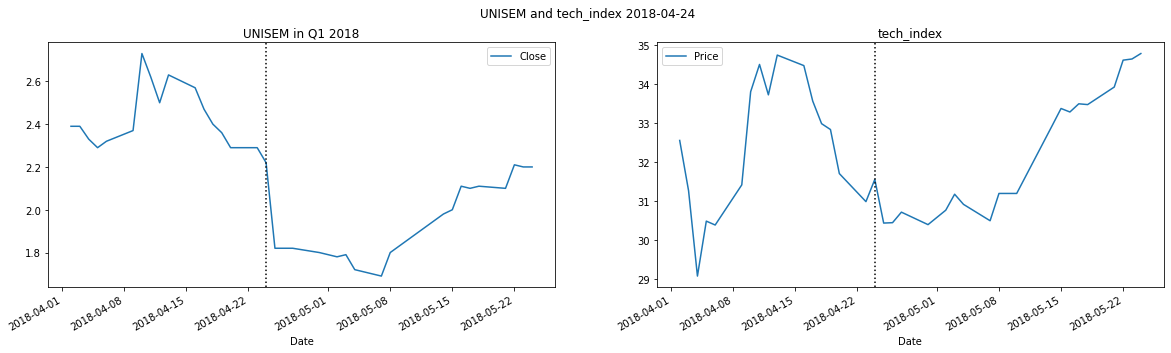

In [ ]:
fig, axes = plt.subplots(figsize=(20,5),nrows=1, ncols=2)
UNISEM[(UNISEM['Date'] >= datetime.datetime(2018,3,31)) & (UNISEM['Date'] <= datetime.datetime(2018,5,24))].plot.line(x='Date',y='Close',ax=axes[0],title ='UNISEM in Q1 2018')
axes[0].axvline(x= datetime.datetime(2018,4,24),linestyle = 'dotted',color='black')
tech_index[(tech_index['Date'] >= datetime.datetime(2018,3,31)) & (tech_index['Date'] <= datetime.datetime(2018,5,24))].plot.line(x='Date',y='Price',ax=axes[1],title = 'tech_index')
axes[1].axvline(x= datetime.datetime(2018,4,24),linestyle = 'dotted',color='black')
plt.suptitle('UNISEM and tech_index 2018-04-24' )

Text(0.5, 0.98, 'UNISEM and tech_index 2016,12,03')

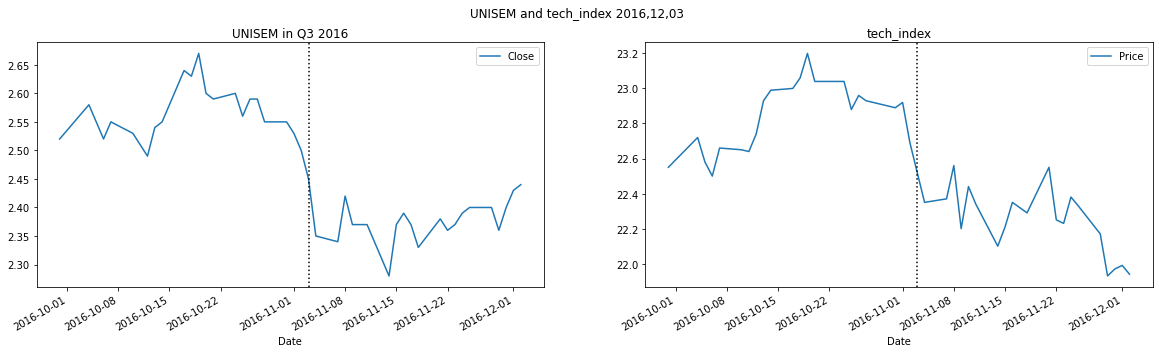

In [82]:
fig, axes = plt.subplots(figsize=(20,5),nrows=1, ncols=2)
UNISEM[(UNISEM['Date'] >= datetime.datetime(2016,9,30)) & (UNISEM['Date'] <= datetime.datetime(2016,12,3))].plot.line(x='Date',y='Close',ax=axes[0],title ='UNISEM in Q3 2016')
axes[0].axvline(x= datetime.datetime(2016,11,3),linestyle = 'dotted',color='black')
tech_index[(tech_index['Date'] >= datetime.datetime(2016,9,30)) & (tech_index['Date'] <= datetime.datetime(2016,12,3))].plot.line(x='Date',y='Price',ax=axes[1],title = 'tech_index')
axes[1].axvline(x= datetime.datetime(2016,11,3),linestyle = 'dotted',color='black')
plt.suptitle('UNISEM and tech_index 2016,12,03' )

**MYEG**

In [ ]:
myeg= df[df['stock_name'].str.contains('MYEG')].sort_values(by=['qrd'],ascending=1)
myeg

,company,stock_name,fye,qtr,qrd,date_announced,cipr,pipr,ccpr,pcpr,cippl,pippl,ccppl,pcppl,cipplt,pipplt,ccpplt,pcpplt,ref,Year,Year_ann
2048,MY E.G. SERVICES BERHAD,MYEG,2008-06-30,3,2008-03-31,2008-05-23,13732000,7035000.0,34972000,18077000.0,4199000.0,2266000.0,10706000.0,4808000.0,4185000.0,2258000.0,10665000.0,4782000.0,583280,2008,2008
1907,MY E.G. SERVICES BERHAD,MYEG,2009-06-30,2,2008-12-31,2009-02-26,13247000,10599000.0,25490000,19622000.0,4724000.0,3740000.0,8922000.0,6508000.0,4698000.0,3727000.0,8849000.0,6481000.0,582375,2009,2009
4823,MY E.G. SERVICES BERHAD,MYEG,2011-06-30,4,2011-06-30,2011-08-26,17898000,13309000.0,58833000,46018000.0,7962000.0,5855000.0,22960000.0,21009000.0,7918000.0,5825000.0,22814000.0,20852000.0,601826,2011,2011
4453,MY E.G. SERVICES BERHAD,MYEG,2013-06-30,3,2013-03-31,2013-05-22,20418000,18340000.0,55671000,49451000.0,9530000.0,7233000.0,24211000.0,19363000.0,9505000.0,7202000.0,24120000.0,19279000.0,599374,2013,2013
5784,MY E.G. SERVICES BERHAD,MYEG,2014-06-30,2,2013-12-31,2014-02-26,23463000,19191000.0,43869000,35253000.0,11295000.0,8140000.0,19861000.0,14681000.0,11205000.0,8112000.0,19746000.0,14615000.0,2260835,2014,2014
6477,MY E.G. SERVICES BERHAD,MYEG,2015-06-30,2,2014-12-31,2015-02-27,29765000,23463000.0,57485000,43869000.0,14166000.0,11295000.0,26296000.0,19861000.0,14048000.0,11205000.0,26072000.0,19746000.0,2557731,2015,2015
6800,MY E.G. SERVICES BERHAD,MYEG,2015-06-30,4,2015-06-30,2015-08-28,45060000,35369000.0,141517000,109872000.0,22742000.0,16950000.0,68212000.0,50710000.0,22928000.0,16629000.0,68046000.0,50113000.0,2608955,2015,2015


Text(0.5, 0.98, 'Revenue')

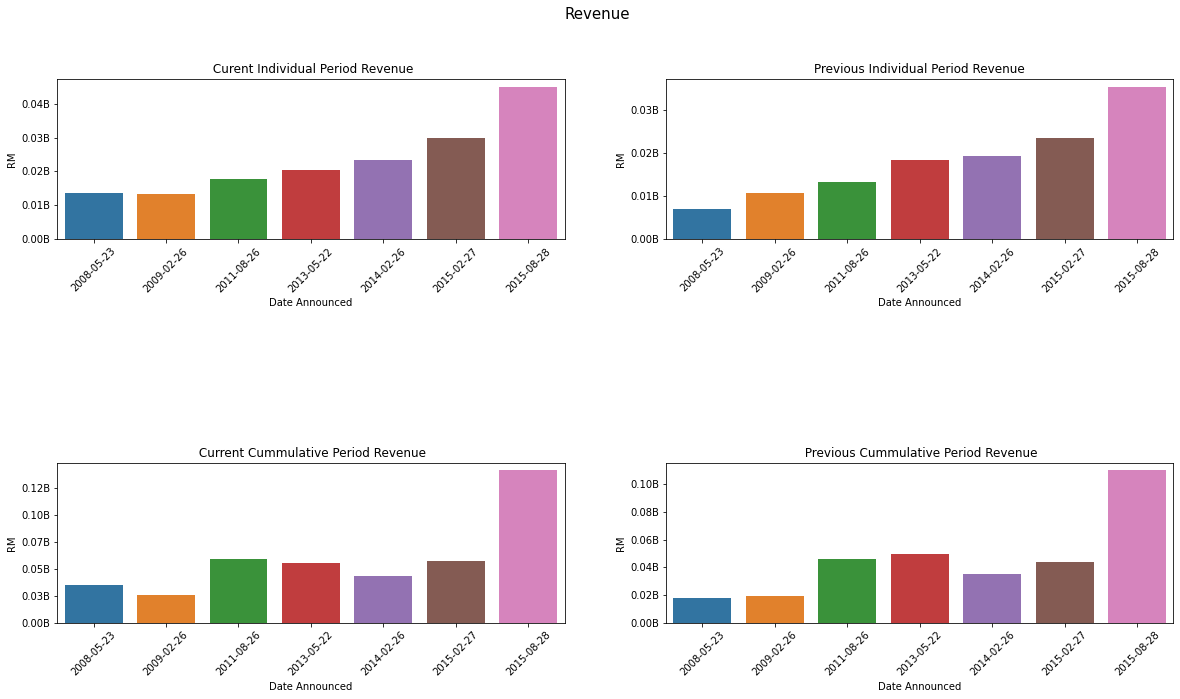

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(3,2,1)
x = sns.barplot(x = myeg.date_announced.dt.date, y= myeg.cipr)
plt.title(' Curent Individual Period Revenue')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,2)
x = sns.barplot(x = myeg.date_announced.dt.date, y= myeg.pipr)
plt.title('Previous Individual Period Revenue')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,5)
x = sns.barplot(x = myeg.date_announced.dt.date, y= myeg.ccpr)
plt.title(' Current Cummulative Period Revenue')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,6)
x = sns.barplot(x = myeg.date_announced.dt.date, y= myeg.pcpr)
plt.title(' Previous Cummulative Period Revenue')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.suptitle('Revenue',fontsize=15)

Text(0.5, 0.98, 'Profit/Loss Before tax')

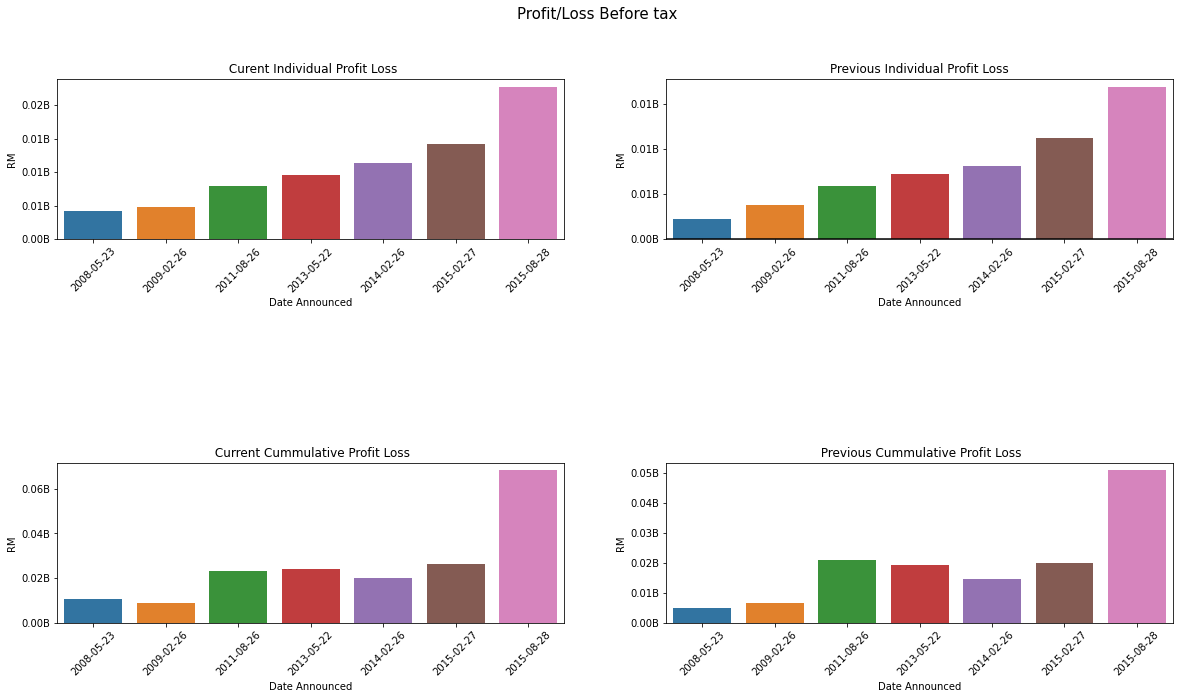

In [ ]:
#Profit/Loss Before tax

plt.figure(figsize=(20,10))

plt.subplot(3,2,1)
x = sns.barplot(x = myeg.date_announced.dt.date, y= myeg.cippl)
plt.title(' Curent Individual Profit Loss')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,2)
x = sns.barplot(x = myeg.date_announced.dt.date, y= myeg.pippl)
plt.title('Previous Individual Profit Loss')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
plt.axhline(y=0, linestyle = 'solid', color= 'black')
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,5)
x = sns.barplot(x = myeg.date_announced.dt.date, y= myeg.ccppl)
plt.title(' Current Cummulative Profit Loss')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,6)
x = sns.barplot(x = myeg.date_announced.dt.date, y= myeg.pcppl)
plt.title(' Previous Cummulative Profit Loss')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.suptitle('Profit/Loss Before tax',fontsize=15)

Text(0.5, 0.98, 'Profit/Loss After tax')

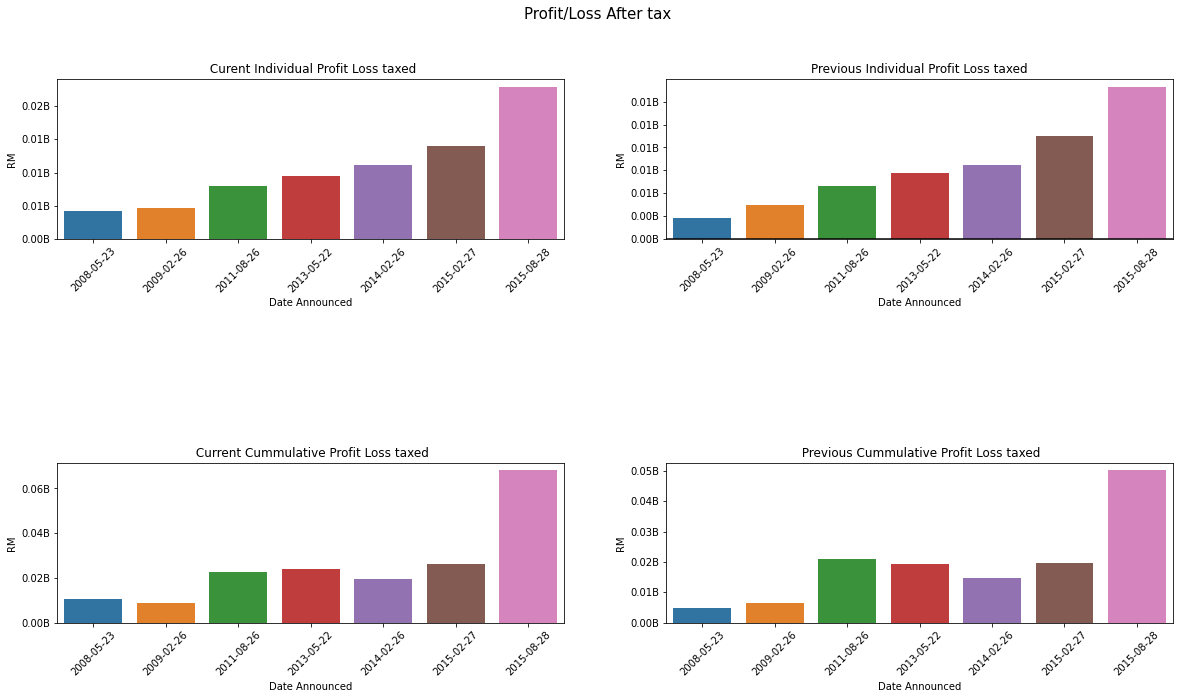

In [ ]:
#Profit/Loss After tax
plt.figure(figsize=(20,10))

plt.subplot(3,2,1)
x = sns.barplot(x = myeg.date_announced.dt.date, y= myeg.cipplt)
plt.title(' Curent Individual Profit Loss taxed')
plt.xlabel('Date Announced')
plt.ylabel('RM')
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)
plt.xticks(rotation =45)

plt.subplot(3,2,2)
x = sns.barplot(x = myeg.date_announced.dt.date, y= myeg.pipplt)
plt.title('Previous Individual Profit Loss taxed')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
plt.axhline(y=0, linestyle = 'solid', color= 'black')
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,5)
x = sns.barplot(x = myeg.date_announced.dt.date, y= myeg.ccpplt)
plt.title(' Current Cummulative Profit Loss taxed')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,6)
x = sns.barplot(x = myeg.date_announced.dt.date, y= myeg.pcpplt)
plt.title(' Previous Cummulative Profit Loss taxed')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.suptitle('Profit/Loss After tax',fontsize=15)

### myeg and tech index Index movemetn prior to announcement date to Financial Date

Text(0.5, 0.98, 'MYEG and TECH Index 2014-2021')

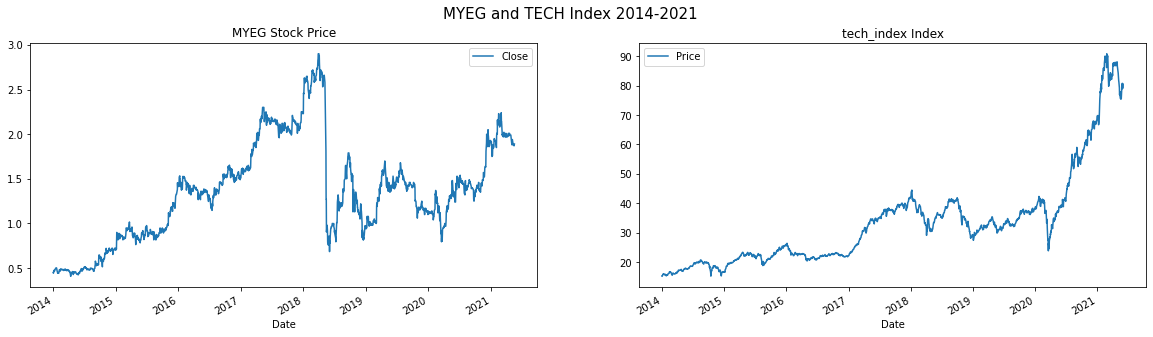

In [ ]:
fig, axes = plt.subplots(figsize=(20,5),nrows=1, ncols=2)


MYEG[(MYEG['Date'] >= datetime.datetime(2014,1,1)) & (MYEG['Date'] <= datetime.datetime(2021,6,1))].plot.line(x='Date',y='Close',ax=axes[0],title ='MYEG Stock Price')

tech_index[(tech_index['Date'] >= datetime.datetime(2013,1,1)) & (tech_index['Date'] <= datetime.datetime(2021,6,1))].plot.line(x='Date',y='Price',ax=axes[1],title = 'tech_index Index')
plt.suptitle('MYEG and TECH Index 2014-2021',fontsize=15)

In [ ]:
myeg


,company,stock_name,fye,qtr,qrd,date_announced,cipr,pipr,ccpr,pcpr,cippl,pippl,ccppl,pcppl,cipplt,pipplt,ccpplt,pcpplt,ref,Year,Year_ann
2048,MY E.G. SERVICES BERHAD,MYEG,2008-06-30,3,2008-03-31,2008-05-23,13732000,7035000.0,34972000,18077000.0,4199000.0,2266000.0,10706000.0,4808000.0,4185000.0,2258000.0,10665000.0,4782000.0,583280,2008,2008
1907,MY E.G. SERVICES BERHAD,MYEG,2009-06-30,2,2008-12-31,2009-02-26,13247000,10599000.0,25490000,19622000.0,4724000.0,3740000.0,8922000.0,6508000.0,4698000.0,3727000.0,8849000.0,6481000.0,582375,2009,2009
4823,MY E.G. SERVICES BERHAD,MYEG,2011-06-30,4,2011-06-30,2011-08-26,17898000,13309000.0,58833000,46018000.0,7962000.0,5855000.0,22960000.0,21009000.0,7918000.0,5825000.0,22814000.0,20852000.0,601826,2011,2011
4453,MY E.G. SERVICES BERHAD,MYEG,2013-06-30,3,2013-03-31,2013-05-22,20418000,18340000.0,55671000,49451000.0,9530000.0,7233000.0,24211000.0,19363000.0,9505000.0,7202000.0,24120000.0,19279000.0,599374,2013,2013
5784,MY E.G. SERVICES BERHAD,MYEG,2014-06-30,2,2013-12-31,2014-02-26,23463000,19191000.0,43869000,35253000.0,11295000.0,8140000.0,19861000.0,14681000.0,11205000.0,8112000.0,19746000.0,14615000.0,2260835,2014,2014
6477,MY E.G. SERVICES BERHAD,MYEG,2015-06-30,2,2014-12-31,2015-02-27,29765000,23463000.0,57485000,43869000.0,14166000.0,11295000.0,26296000.0,19861000.0,14048000.0,11205000.0,26072000.0,19746000.0,2557731,2015,2015
6800,MY E.G. SERVICES BERHAD,MYEG,2015-06-30,4,2015-06-30,2015-08-28,45060000,35369000.0,141517000,109872000.0,22742000.0,16950000.0,68212000.0,50710000.0,22928000.0,16629000.0,68046000.0,50113000.0,2608955,2015,2015


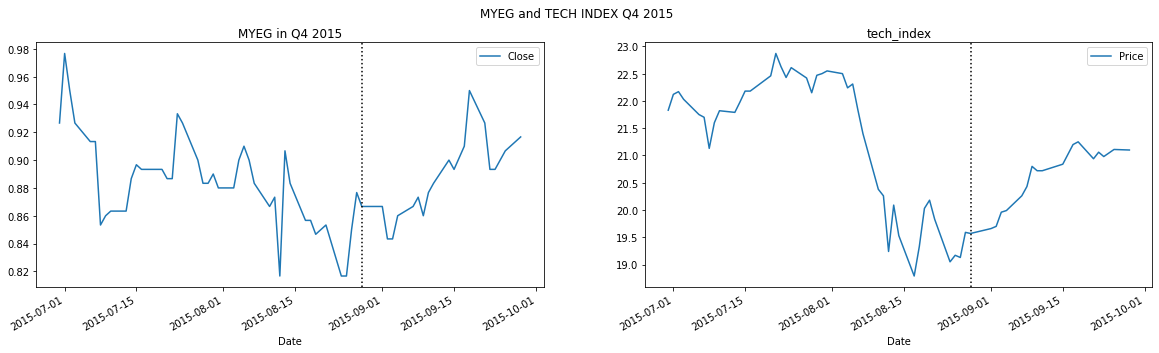

In [ ]:
fig, axes = plt.subplots(figsize=(20,5),nrows=1, ncols=2)
MYEG[(MYEG['Date'] >= datetime.datetime(2015,6,30)) & (MYEG['Date'] <= datetime.datetime(2015,9,28))].plot.line(x='Date',y='Close',ax=axes[0],title ='MYEG in Q4 2015')
axes[0].axvline(x= datetime.datetime(2015,8,28),linestyle = 'dotted',color='black')

tech_index[(tech_index['Date'] >= datetime.datetime(2015,6,30)) & (tech_index['Date'] <= datetime.datetime(2015,9,28))].plot.line(x='Date',y='Price',ax=axes[1],title = 'tech_index')
plt.suptitle('MYEG and TECH INDEX Q4 2015' )
axes[1].axvline(x= datetime.datetime(2015,8,28),linestyle = 'dotted',color='black')

**CENSOF and TECH Index movement prior to announcement date of Financial Report**

In [69]:
start = datetime.datetime(2004,1,1)
end = datetime.datetime(2021,6,14)

CENSOF = web.DataReader('5195.KL','yahoo',start,end).reset_index()
CENSOF= CENSOF[(CENSOF['Date'] >= datetime.datetime(2005,1,1)) & (CENSOF['Date'] <= datetime.datetime(2021,6,14))]
CENSOF

,Date,High,Low,Open,Close,Volume,Adj Close
0,2011-01-31,0.5000,0.4700,0.4700,0.4800,40525200.0,0.441305
1,2011-02-02,0.4900,0.4825,0.4850,0.4850,2579800.0,0.445902
2,2011-02-07,0.4900,0.4750,0.4875,0.4775,2249200.0,0.439007
3,2011-02-08,0.4925,0.4725,0.4775,0.4750,7808400.0,0.436708
4,2011-02-09,0.4800,0.4700,0.4775,0.4775,7114800.0,0.439007
...,...,...,...,...,...,...,...
2551,2021-06-08,0.4500,0.3950,0.3950,0.4400,34705800.0,0.440000
2552,2021-06-09,0.4500,0.4100,0.4350,0.4200,16734700.0,0.420000
2553,2021-06-10,0.4600,0.4150,0.4250,0.4550,27986700.0,0.455000
2554,2021-06-11,0.4700,0.4350,0.4700,0.4400,29001900.0,0.440000


In [25]:
censof= df[df['stock_name'].str.contains('CENSOF')].sort_values(by=['qrd'],ascending=1)
censof

,company,stock_name,fye,qtr,qrd,date_announced,cipr,pipr,ccpr,pcpr,cippl,pippl,ccppl,pcppl,cipplt,pipplt,ccpplt,pcpplt,ref,Year,Year_ann
4446,CENSOF HOLDINGS BERHAD,CENSOF,2013-12-31,1,2013-03-31,2013-05-22,11275000,8523000.0,11275000,8523000.0,2360000.0,2024000.0,2360000.0,2024000.0,2269000.0,2015000.0,2269000.0,2015000.0,599346,2013,2013
5751,CENSOF HOLDINGS BERHAD,CENSOF,2013-12-31,3,2013-09-30,2013-11-29,7647000,5328000.0,33128000,27125000.0,1349000.0,1680000.0,4474000.0,4641000.0,1230000.0,1678000.0,4233000.0,4626000.0,2260608,2013,2013
6310,CENSOF HOLDINGS BERHAD,CENSOF,2015-03-31,1,2014-06-30,2014-08-22,31524000,14206000.0,31524000,0.0,6716000.0,767000.0,6716000.0,0.0,5015000.0,737000.0,5015000.0,0.0,2448420,2015,2014


Text(0.5, 0.98, 'Revenue')

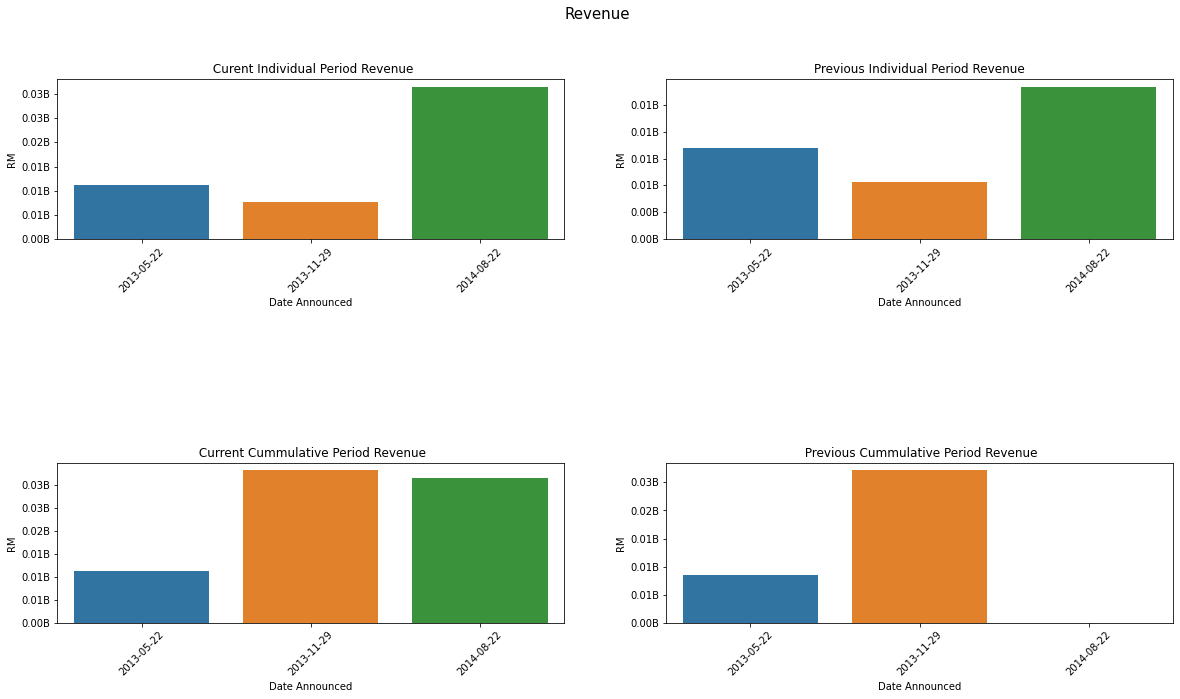

In [22]:
#revenue

plt.figure(figsize=(20,10))

plt.subplot(3,2,1)
x = sns.barplot(x = censof.date_announced.dt.date, y= censof.cipr)
plt.title(' Curent Individual Period Revenue')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,2)
x = sns.barplot(x = censof.date_announced.dt.date, y= censof.pipr)
plt.title('Previous Individual Period Revenue')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,5)
x = sns.barplot(x = censof.date_announced.dt.date, y= censof.ccpr)
plt.title(' Current Cummulative Period Revenue')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,6)
x = sns.barplot(x = censof.date_announced.dt.date, y= censof.pcpr)
plt.title(' Previous Cummulative Period Revenue')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.suptitle('Revenue',fontsize=15)


Text(0.5, 0.98, 'Profit/Loss Before tax')

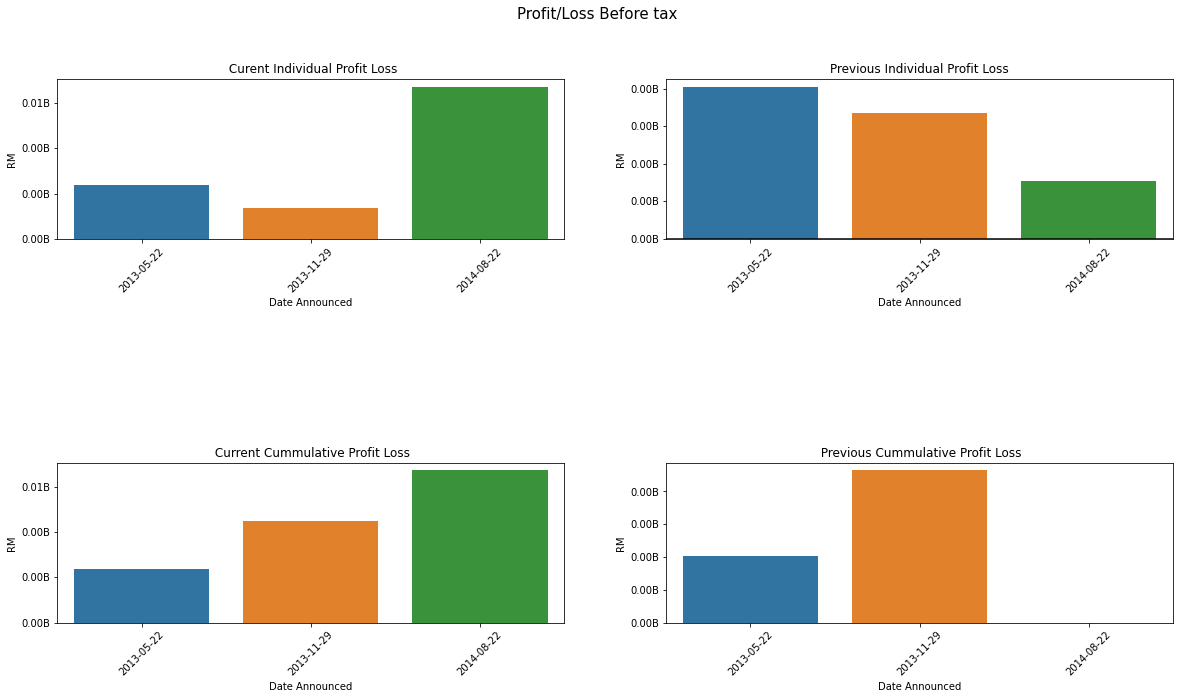

In [ ]:
#Profit/Loss Before tax

plt.figure(figsize=(20,10))

plt.subplot(3,2,1)
x = sns.barplot(x = censof.date_announced.dt.date, y= censof.cippl)
plt.title(' Curent Individual Profit Loss')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,2)
x = sns.barplot(x = censof.date_announced.dt.date, y= censof.pippl)
plt.title('Previous Individual Profit Loss')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
plt.axhline(y=0, linestyle = 'solid', color= 'black')
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,5)
x = sns.barplot(x = censof.date_announced.dt.date, y= censof.ccppl)
plt.title(' Current Cummulative Profit Loss')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,6)
x = sns.barplot(x = censof.date_announced.dt.date, y= censof.pcppl)
plt.title(' Previous Cummulative Profit Loss')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.suptitle('Profit/Loss Before tax',fontsize=15)

Text(0.5, 0.98, 'Profit/Loss After tax')

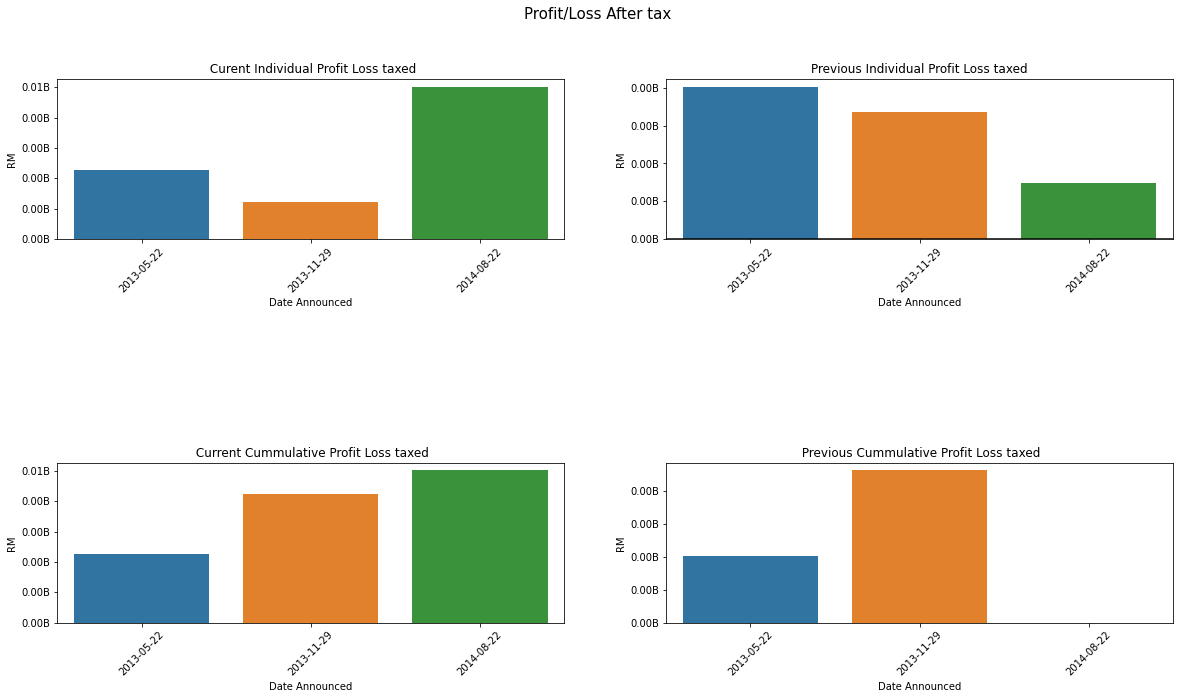

In [ ]:
#Profit/Loss After tax
plt.figure(figsize=(20,10))

plt.subplot(3,2,1)
x = sns.barplot(x = censof.date_announced.dt.date, y= censof.cipplt)
plt.title(' Curent Individual Profit Loss taxed')
plt.xlabel('Date Announced')
plt.ylabel('RM')
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)
plt.xticks(rotation =45)

plt.subplot(3,2,2)
x = sns.barplot(x = censof.date_announced.dt.date, y= censof.pipplt)
plt.title('Previous Individual Profit Loss taxed')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
plt.axhline(y=0, linestyle = 'solid', color= 'black')
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,5)
x = sns.barplot(x = censof.date_announced.dt.date, y= censof.ccpplt)
plt.title(' Current Cummulative Profit Loss taxed')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,6)
x = sns.barplot(x = censof.date_announced.dt.date, y= censof.pcpplt)
plt.title(' Previous Cummulative Profit Loss taxed')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.suptitle('Profit/Loss After tax',fontsize=15)

### CENSOF and TECH Index movemetn prior to announcement date to Financial Date

Text(0.5, 0.98, 'CENSOF and TECH INDEX 2014-2021')

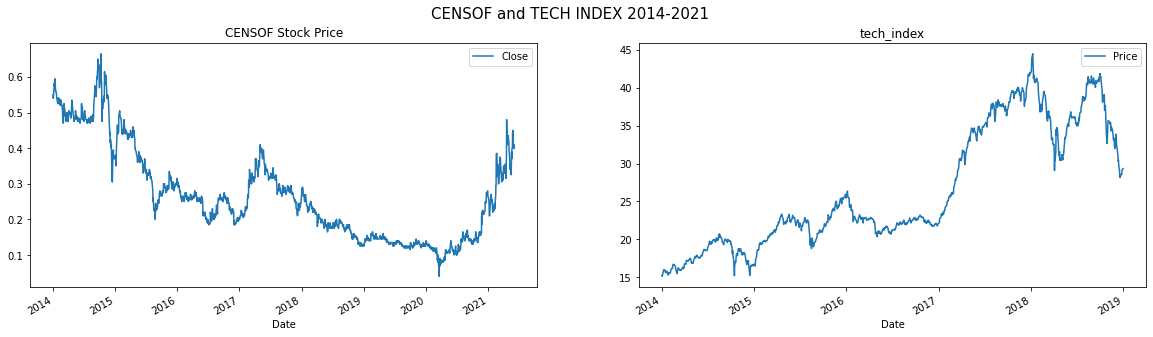

In [70]:
fig, axes = plt.subplots(figsize=(20,5),nrows=1, ncols=2)


CENSOF[(CENSOF['Date'] >= datetime.datetime(2014,1,1)) & (CENSOF['Date'] <= datetime.datetime(2021,6,5))].plot.line(x='Date',y='Close',ax=axes[0],title ='CENSOF Stock Price')

tech_index[(tech_index['Date'] >= datetime.datetime(2013,1,1)) & (tech_index['Date'] <= datetime.datetime(2018,12,31))].plot.line(x='Date',y='Price',ax=axes[1],title = 'tech_index')
plt.suptitle('CENSOF and TECH INDEX 2014-2021',fontsize=15)

In [27]:
censof


,company,stock_name,fye,qtr,qrd,date_announced,cipr,pipr,ccpr,pcpr,cippl,pippl,ccppl,pcppl,cipplt,pipplt,ccpplt,pcpplt,ref,Year,Year_ann
4446,CENSOF HOLDINGS BERHAD,CENSOF,2013-12-31,1,2013-03-31,2013-05-22,11275000,8523000.0,11275000,8523000.0,2360000.0,2024000.0,2360000.0,2024000.0,2269000.0,2015000.0,2269000.0,2015000.0,599346,2013,2013
5751,CENSOF HOLDINGS BERHAD,CENSOF,2013-12-31,3,2013-09-30,2013-11-29,7647000,5328000.0,33128000,27125000.0,1349000.0,1680000.0,4474000.0,4641000.0,1230000.0,1678000.0,4233000.0,4626000.0,2260608,2013,2013
6310,CENSOF HOLDINGS BERHAD,CENSOF,2015-03-31,1,2014-06-30,2014-08-22,31524000,14206000.0,31524000,0.0,6716000.0,767000.0,6716000.0,0.0,5015000.0,737000.0,5015000.0,0.0,2448420,2015,2014


**Q1 2015**

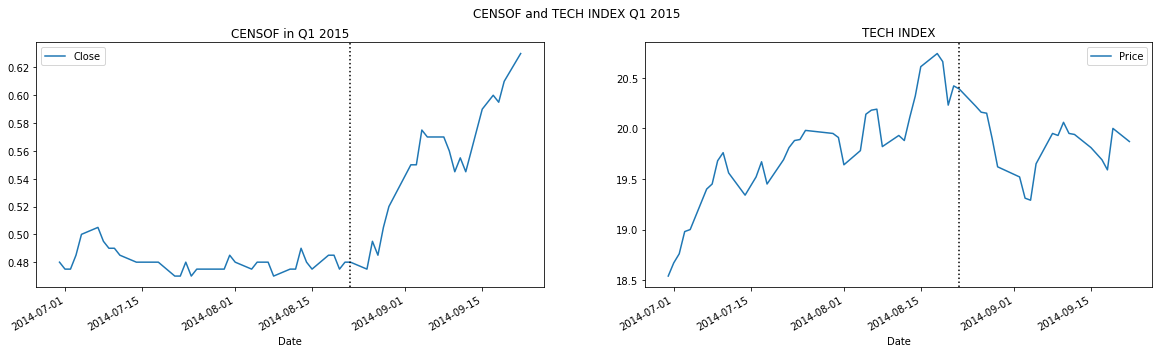

In [71]:
fig, axes = plt.subplots(figsize=(20,5),nrows=1, ncols=2)
CENSOF[(CENSOF['Date'] >= datetime.datetime(2014,6,30)) & (CENSOF['Date'] <= datetime.datetime(2014,9,22))].plot.line(x='Date',y='Close',ax=axes[0],
                                                                                                                      title ='CENSOF in Q1 2015')
axes[0].axvline(x= datetime.datetime(2014,8,22),linestyle = 'dotted',color='black')

tech_index[(tech_index['Date'] >= datetime.datetime(2014,6,30)) & (tech_index['Date'] <= datetime.datetime(2014,9,22))].plot.line(x='Date',y='Price',ax=axes[1],title = 'TECH INDEX')
plt.suptitle('CENSOF and TECH INDEX Q1 2015' )
axes[1].axvline(x= datetime.datetime(2014,8,22),linestyle = 'dotted',color='black')

**MPAY and TECH Index movement prior to announcement date of Financial Report**

In [ ]:
start = datetime.datetime(2004,1,1)
end = datetime.datetime(2021,6,14)

MPAY = web.DataReader('0156.KL','yahoo',start,end).reset_index()
MPAY= MPAY[(MPAY['Date'] >= datetime.datetime(2005,1,1)) & (MPAY['Date'] <= datetime.datetime(2021,6,14))]
MPAY

,Date,High,Low,Open,Close,Volume,Adj Close
0,2011-03-15,0.246137,0.181364,0.224546,0.190000,157668491.0,0.190000
1,2011-03-16,0.211591,0.168409,0.198637,0.181364,48269886.0,0.181364
2,2011-03-17,0.177046,0.164091,0.177046,0.172727,5684197.0,0.172727
3,2011-03-18,0.172727,0.155455,0.172727,0.159773,5954680.0,0.159773
4,2011-03-21,0.159773,0.151136,0.155455,0.155455,16519963.0,0.155455
...,...,...,...,...,...,...,...
2524,2021-06-08,0.245000,0.230000,0.235000,0.235000,30891200.0,0.235000
2525,2021-06-09,0.270000,0.225000,0.235000,0.265000,148480100.0,0.265000
2526,2021-06-10,0.255000,0.230000,0.250000,0.240000,148334300.0,0.240000
2527,2021-06-11,0.240000,0.230000,0.240000,0.230000,26950500.0,0.230000


In [ ]:
mpay= df[df['stock_name'].str.contains('MPAY')].sort_values(by=['qrd'],ascending=1)
mpay

,company,stock_name,fye,qtr,qrd,date_announced,cipr,pipr,ccpr,pcpr,cippl,pippl,ccppl,pcppl,cipplt,pipplt,ccpplt,pcpplt,ref,Year,Year_ann
4852,MANAGEPAY SYSTEMS BERHAD,MPAY,2011-12-31,3,2011-09-30,2011-11-18,2480000,0.0,7253000,0.0,-669000.0,0.0,-934000.0,0.0,-780000.0,0.0,-1074000.0,0.0,602055,2011,2011
5474,MANAGEPAY SYSTEMS BERHAD,MPAY,2012-12-31,2,2012-06-30,2012-08-29,1421000,3001000.0,3194000,4774000.0,-33000.0,-353000.0,214000.0,-264000.0,-43000.0,-319000.0,193000.0,-294000.0,606067,2012,2012
4371,MANAGEPAY SYSTEMS BERHAD,MPAY,2013-12-31,1,2013-03-31,2013-05-23,2097000,1773000.0,2097000,1773000.0,682000.0,247000.0,682000.0,247000.0,479000.0,236000.0,479000.0,236000.0,598782,2013,2013
5893,MANAGEPAY SYSTEMS BERHAD,MPAY,2013-12-31,3,2013-09-30,2013-11-27,1617000,1620000.0,5703000,4814000.0,25000.0,234000.0,1002000.0,448000.0,-95000.0,104000.0,517000.0,297000.0,2261403,2013,2013
5825,MANAGEPAY SYSTEMS BERHAD,MPAY,2014-12-31,1,2014-03-31,2014-05-23,2884000,2097000.0,2884000,2097000.0,824000.0,682000.0,824000.0,682000.0,760000.0,479000.0,760000.0,479000.0,2261030,2014,2014
6723,MANAGEPAY SYSTEMS BERHAD,MPAY,2015-12-31,2,2015-06-30,2015-08-24,2640000,1809000.0,5942000,4693000.0,73000.0,185000.0,473000.0,1009000.0,54000.0,80000.0,156000.0,840000.0,2605611,2015,2015
7052,MANAGEPAY SYSTEMS BERHAD,MPAY,2015-12-31,4,2015-12-31,2016-02-29,1803000,3229000.0,8743000,10584000.0,-2065000.0,839000.0,-10913000.0,2580000.0,-1794000.0,472000.0,-11053000.0,1291000.0,2651780,2015,2016
7325,MANAGEPAY SYSTEMS BERHAD,MPAY,2016-12-31,2,2016-06-30,2016-08-26,1698000,2640000.0,2886000,5942000.0,-1199000.0,73000.0,-2577000.0,473000.0,-1013000.0,54000.0,-2588000.0,156000.0,2696686,2016,2016
7645,MANAGEPAY SYSTEMS BERHAD,MPAY,2016-12-31,4,2016-12-31,2017-02-27,2151000,1803000.0,6097000,8743000.0,-742000.0,-2065000.0,-4954000.0,-10913000.0,-141000.0,-1794000.0,-4590000.0,-11053000.0,2738767,2016,2017


Text(0.5, 0.98, 'Revenue')

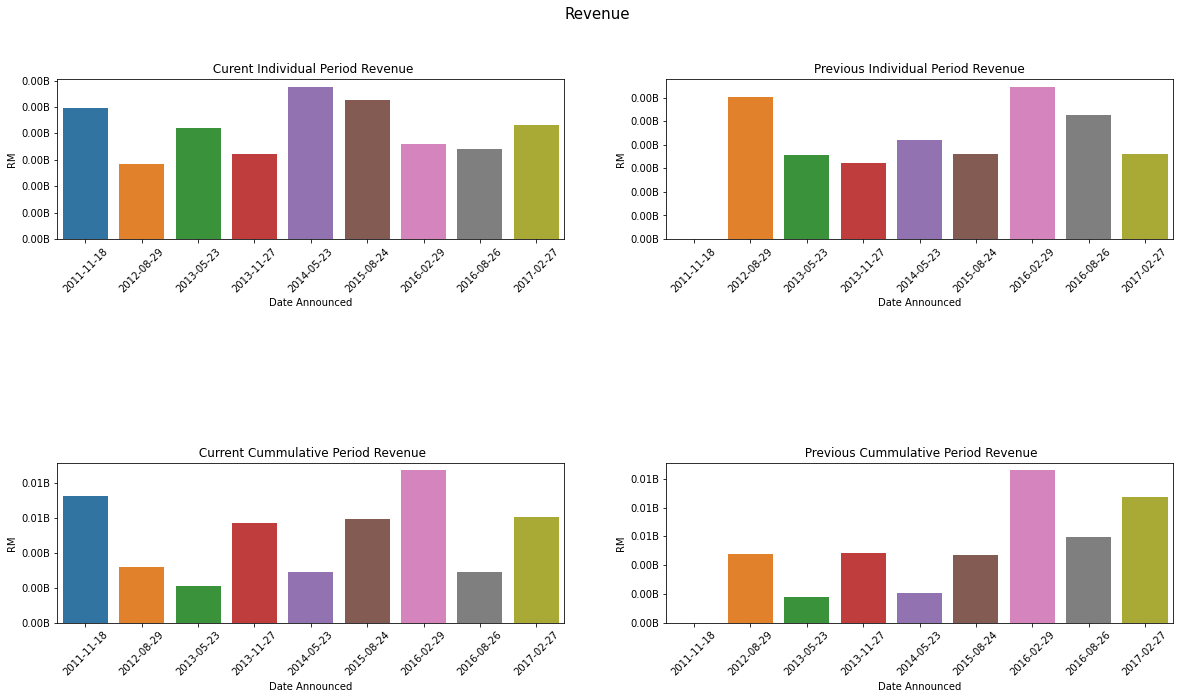

In [ ]:
#REVENUE

plt.figure(figsize=(20,10))

plt.subplot(3,2,1)
x = sns.barplot(x = mpay.date_announced.dt.date, y= mpay.cipr)
plt.title(' Curent Individual Period Revenue')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,2)
x = sns.barplot(x = mpay.date_announced.dt.date, y= mpay.pipr)
plt.title('Previous Individual Period Revenue')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,5)
x = sns.barplot(x = mpay.date_announced.dt.date, y= mpay.ccpr)
plt.title(' Current Cummulative Period Revenue')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,6)
x = sns.barplot(x = mpay.date_announced.dt.date, y= mpay.pcpr)
plt.title(' Previous Cummulative Period Revenue')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.suptitle('Revenue',fontsize=15)

Text(0.5, 0.98, 'Profit/Loss Before tax')

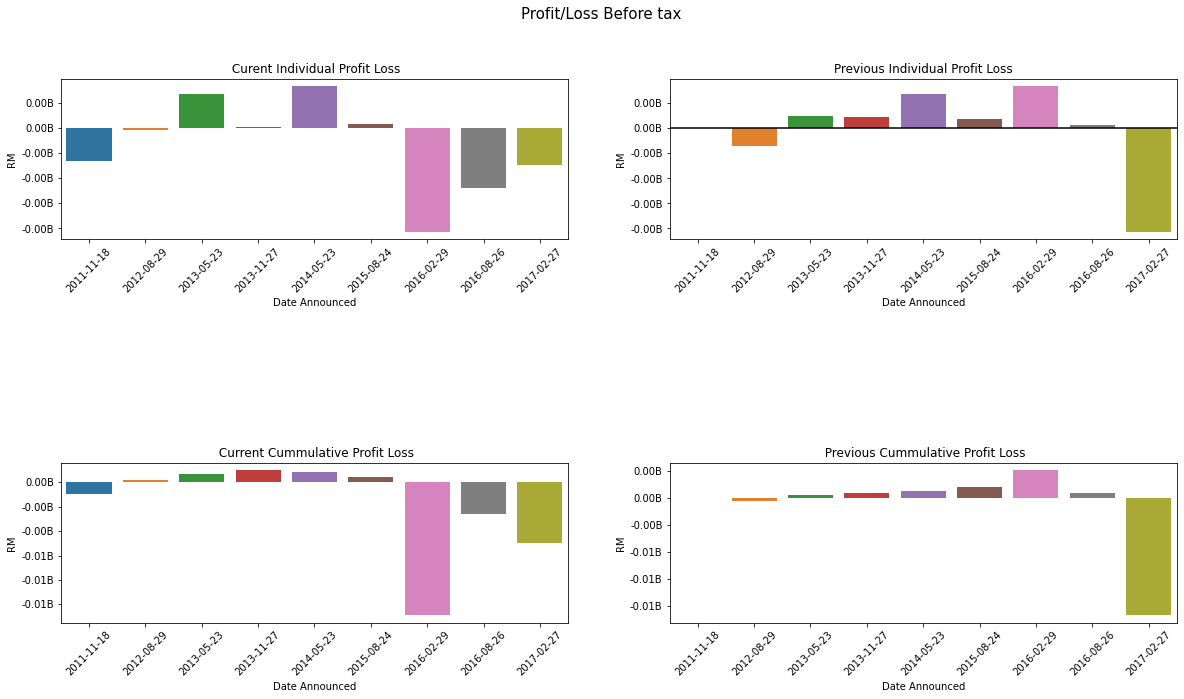

In [ ]:
#Profit/Loss Before tax
plt.figure(figsize=(20,10))

plt.subplot(3,2,1)
x = sns.barplot(x =mpay.date_announced.dt.date, y=mpay.cippl)
plt.title(' Curent Individual Profit Loss')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,2)
x = sns.barplot(x =mpay.date_announced.dt.date, y=mpay.pippl)
plt.title('Previous Individual Profit Loss')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
plt.axhline(y=0, linestyle = 'solid', color= 'black')
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,5)
x = sns.barplot(x =mpay.date_announced.dt.date, y=mpay.ccppl)
plt.title(' Current Cummulative Profit Loss')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,6)
x = sns.barplot(x =mpay.date_announced.dt.date, y=mpay.pcppl)
plt.title(' Previous Cummulative Profit Loss')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.suptitle('Profit/Loss Before tax',fontsize=15)

Text(0.5, 0.98, 'Profit/Loss After tax')

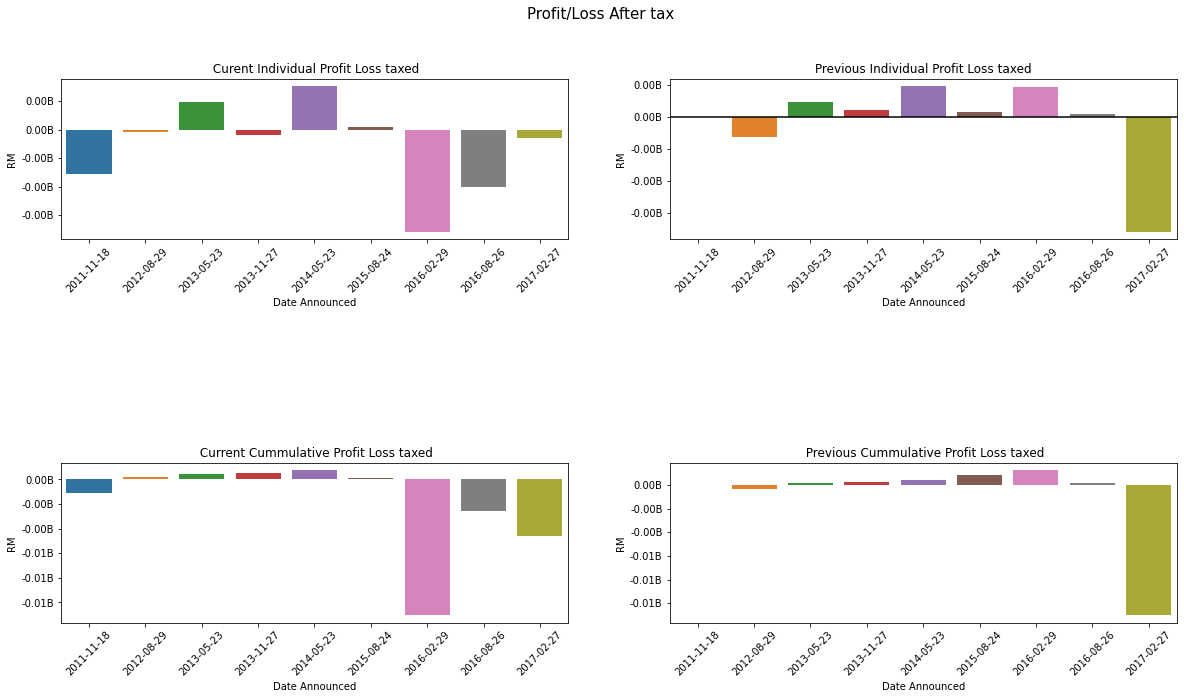

In [ ]:
#Profit/Loss After tax

plt.figure(figsize=(20,10))

plt.subplot(3,2,1)
x = sns.barplot(x = mpay.date_announced.dt.date, y= mpay.cipplt)
plt.title(' Curent Individual Profit Loss taxed')
plt.xlabel('Date Announced')
plt.ylabel('RM')
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)
plt.xticks(rotation =45)

plt.subplot(3,2,2)
x = sns.barplot(x = mpay.date_announced.dt.date, y= mpay.pipplt)
plt.title('Previous Individual Profit Loss taxed')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
plt.axhline(y=0, linestyle = 'solid', color= 'black')
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,5)
x = sns.barplot(x = mpay.date_announced.dt.date, y= mpay.ccpplt)
plt.title(' Current Cummulative Profit Loss taxed')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,6)
x = sns.barplot(x = mpay.date_announced.dt.date, y= mpay.pcpplt)
plt.title(' Previous Cummulative Profit Loss taxed')
plt.xlabel('Date Announced')
plt.ylabel('RM')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.suptitle('Profit/Loss After tax',fontsize=15)

MPAY and TECH Index movement prior to announcement date of Financial Report

Text(0.5, 0.98, 'MPAY and TECH Index 2014-2021')

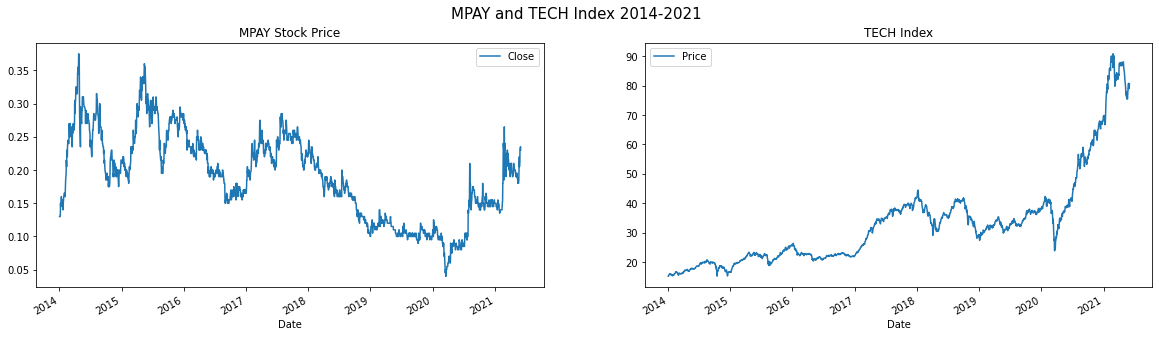

In [ ]:
fig, axes = plt.subplots(figsize=(20,5),nrows=1, ncols=2)


MPAY[(MPAY['Date'] >= datetime.datetime(2014,1,1)) & (MPAY['Date'] <= datetime.datetime(2021,6,1))].plot.line(x='Date',y='Close',ax=axes[0],title ='MPAY Stock Price')

tech_index[(tech_index['Date'] >= datetime.datetime(2014,1,1)) & (tech_index['Date'] <= datetime.datetime(2021,6,1))].plot.line(x='Date',y='Price',ax=axes[1],title = 'TECH Index')
plt.suptitle('MPAY and TECH Index 2014-2021',fontsize=15)

In [ ]:
mpay

,company,stock_name,fye,qtr,qrd,date_announced,cipr,pipr,ccpr,pcpr,cippl,pippl,ccppl,pcppl,cipplt,pipplt,ccpplt,pcpplt,ref,Year,Year_ann
4852,MANAGEPAY SYSTEMS BERHAD,MPAY,2011-12-31,3,2011-09-30,2011-11-18,2480000,0.0,7253000,0.0,-669000.0,0.0,-934000.0,0.0,-780000.0,0.0,-1074000.0,0.0,602055,2011,2011
5474,MANAGEPAY SYSTEMS BERHAD,MPAY,2012-12-31,2,2012-06-30,2012-08-29,1421000,3001000.0,3194000,4774000.0,-33000.0,-353000.0,214000.0,-264000.0,-43000.0,-319000.0,193000.0,-294000.0,606067,2012,2012
4371,MANAGEPAY SYSTEMS BERHAD,MPAY,2013-12-31,1,2013-03-31,2013-05-23,2097000,1773000.0,2097000,1773000.0,682000.0,247000.0,682000.0,247000.0,479000.0,236000.0,479000.0,236000.0,598782,2013,2013
5893,MANAGEPAY SYSTEMS BERHAD,MPAY,2013-12-31,3,2013-09-30,2013-11-27,1617000,1620000.0,5703000,4814000.0,25000.0,234000.0,1002000.0,448000.0,-95000.0,104000.0,517000.0,297000.0,2261403,2013,2013
5825,MANAGEPAY SYSTEMS BERHAD,MPAY,2014-12-31,1,2014-03-31,2014-05-23,2884000,2097000.0,2884000,2097000.0,824000.0,682000.0,824000.0,682000.0,760000.0,479000.0,760000.0,479000.0,2261030,2014,2014
6723,MANAGEPAY SYSTEMS BERHAD,MPAY,2015-12-31,2,2015-06-30,2015-08-24,2640000,1809000.0,5942000,4693000.0,73000.0,185000.0,473000.0,1009000.0,54000.0,80000.0,156000.0,840000.0,2605611,2015,2015
7052,MANAGEPAY SYSTEMS BERHAD,MPAY,2015-12-31,4,2015-12-31,2016-02-29,1803000,3229000.0,8743000,10584000.0,-2065000.0,839000.0,-10913000.0,2580000.0,-1794000.0,472000.0,-11053000.0,1291000.0,2651780,2015,2016
7325,MANAGEPAY SYSTEMS BERHAD,MPAY,2016-12-31,2,2016-06-30,2016-08-26,1698000,2640000.0,2886000,5942000.0,-1199000.0,73000.0,-2577000.0,473000.0,-1013000.0,54000.0,-2588000.0,156000.0,2696686,2016,2016
7645,MANAGEPAY SYSTEMS BERHAD,MPAY,2016-12-31,4,2016-12-31,2017-02-27,2151000,1803000.0,6097000,8743000.0,-742000.0,-2065000.0,-4954000.0,-10913000.0,-141000.0,-1794000.0,-4590000.0,-11053000.0,2738767,2016,2017


**Q4 2016-12-31**

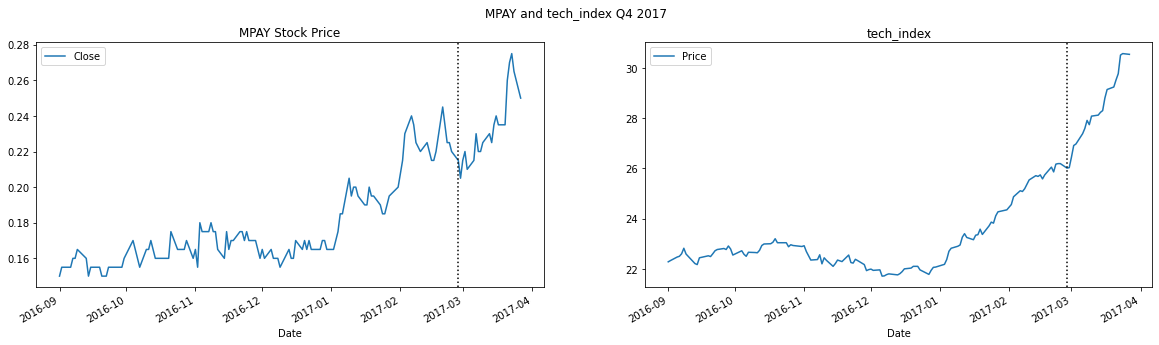

In [ ]:
fig, axes = plt.subplots(figsize=(20,5),nrows=1, ncols=2)
MPAY[(MPAY['Date'] >= datetime.datetime(2016,8,31)) & (MPAY['Date'] <= datetime.datetime(2017,3,27))].plot.line(x='Date',y='Close',ax=axes[0],
                                                                                                                      title ='MPAY Stock Price')
axes[0].axvline(x= datetime.datetime(2017,2,27),linestyle = 'dotted',color='black')

tech_index[(tech_index['Date'] >= datetime.datetime(2016,8,31)) & (tech_index['Date'] <= datetime.datetime(2017,3,27))].plot.line(x='Date',y='Price',ax=axes[1],title = 'tech_index')
plt.suptitle('MPAY and tech_index Q4 2017' )
axes[1].axvline(x= datetime.datetime(2017,2,27),linestyle = 'dotted',color='black')